# CNRR and GPM IMERG/ MSWEP  

This notebook examines compares the high resolution satellite precip datasets GPM IMERG/MSWEP with CNRR, in order to see whether observed precipitation patterns (storms) are captured by the reanalysis (whichi then can be used for further analysis)

# Basic statistics

In [48]:
import numpy as np 
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import pandas as pd
import iris
import xarray as xr 
import tobac


def read_in_netcdf(file, param):
    dataset = Dataset(file)    
    precip= np.array(dataset[str(param)])
    dataset.close()
    return precip

## Histogram 

In [49]:
#  plot histogram based on bins and heights (output from np.histogram)

def plot_histograms(heights,heights2, bins, bins2): 
    a= np.sum(heights)
    b= np.sum(heights2)
    
    plt.style.use('seaborn')
    plt.rcParams.update({'font.size': 35,
                 'xtick.labelsize' : 35,
                 'ytick.labelsize' : 35})
    plt.figure(figsize=(20, 17))

    plt.subplot(2,2,1)
    plt.title('GPM', fontsize= '30')
    plt.bar(bins[:-1], (heights/a)*100, width = 1.0, color= 'k')
    plt.ylabel('Frequency (%)', fontsize= 35)
    plt.xlabel('Rain rates (mm/hr)', fontsize= 35)
    plt.xlim(0,10)
    plt.ylim(0,50)
    
    #thresholds
    plt.axvline(x=1, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=2, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=3, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=4, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=5, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=7, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=10, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=15, ymin=0, ymax=50,linestyle= '--', color= 'k')

    
    plt.subplot(2,2,2)
    plt.title('CNRR', fontsize= '30')
    plt.bar(bins2[:-1], (heights2/b)*100, width = 1.0, color= 'k')
    plt.ylabel('Frequency (%)', fontsize= 35)
    plt.xlabel('Rain rates (mm/hr)', fontsize= 35)
    plt.xlim(0,10)
    plt.ylim(0,50)
    
    #thresholds
    plt.axvline(x=1, ymin=0, ymax=50,linestyle=  '--', color= 'k')
    plt.axvline(x=2, ymin=0, ymax=50, linestyle= '--', color= 'k')
    plt.axvline(x=3, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=4, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=5, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=7, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=10, ymin=0, ymax=50,linestyle= '--', color= 'k')
    plt.axvline(x=15, ymin=0, ymax=50,linestyle= '--', color= 'k')
    
    plt.savefig('/media/juli/Elements/comparison/histogram_gpm_cnrr_withthresholds.pdf')

In [52]:
file_list= glob.glob('/media/juli/Elements/ERA5/monthly/era_precip_tobac_input_*.nc')  

In [60]:
# GPM, calculate occurrences 
nbins = 100
heights = np.zeros((nbins,))
i = 0 
for file in file_list:
    precip= read_in_netcdf(file, param='tp')
    precip = precip*1000
    h, b   = np.histogram(precip[precip > 0.1], bins = nbins)
    bins = b
    heights += h
    i += 1
    if i % 10 == 0:
        print(i)
    

10
20
30
40
50
60
70
80
90
100
110
120


In [9]:
file_list_cnrr= glob.glob('/media/juli/Data/third_pole/CNRR/data/2014_2016/cnrr*.nc4')  

In [10]:
# CNRR, calculate occurrences
nbins = 100
heights2 = np.zeros((nbins,))
i = 0 
for file in file_list_cnrr:
    precip= read_in_netcdf(file, param='prcp')
    h, b   = np.histogram(precip[precip > 0.1], bins = nbins)
    bins2 = b
    heights2 += h
    i += 1
    if i % 10000 == 0:
        print(i)
    

In [57]:
bins.shape

(101,)

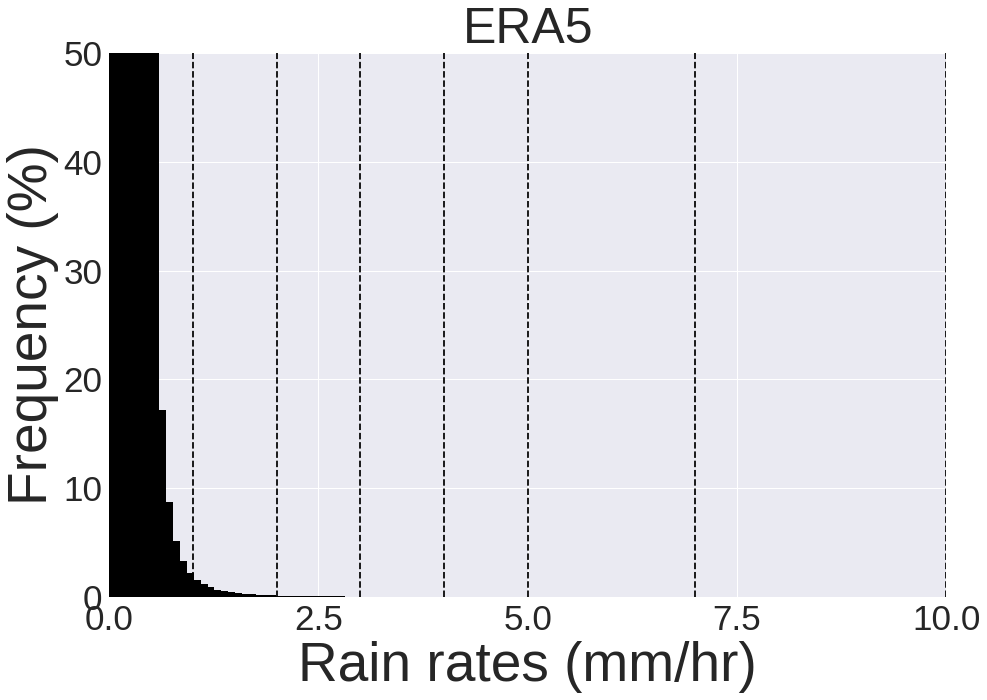

In [71]:
a= np.sum(heights)


plt.style.use('seaborn')
plt.rcParams.update({'font.size': 35,
             'xtick.labelsize' : 35,
             'ytick.labelsize' : 35})
plt.figure(figsize=(15, 10))


plt.title('ERA5', fontsize= '50')
plt.bar(bins[:-1], (heights/a)*100, width = 1.0, color= 'k')
plt.ylabel('Frequency (%)', fontsize= 55)
plt.xlabel('Rain rates (mm/hr)', fontsize= 55)
plt.xlim(0,10)
plt.xticks([0., 2.5, 5.0, 7.5, 10.0])
plt.ylim(0,50)

#thresholds
plt.axvline(x=1, ymin=0, ymax=50,linestyle= '--', color= 'k')
plt.axvline(x=2, ymin=0, ymax=50,linestyle= '--', color= 'k')
plt.axvline(x=3, ymin=0, ymax=50,linestyle= '--', color= 'k')
plt.axvline(x=4, ymin=0, ymax=50,linestyle= '--', color= 'k')
plt.axvline(x=5, ymin=0, ymax=50,linestyle= '--', color= 'k')
plt.axvline(x=7, ymin=0, ymax=50,linestyle= '--', color= 'k')
plt.axvline(x=10, ymin=0, ymax=50,linestyle= '--', color= 'k')
plt.axvline(x=15, ymin=0, ymax=50,linestyle= '--', color= 'k')


plt.savefig('/media/juli/Elements/comparison/histogram_ERA5.pdf')



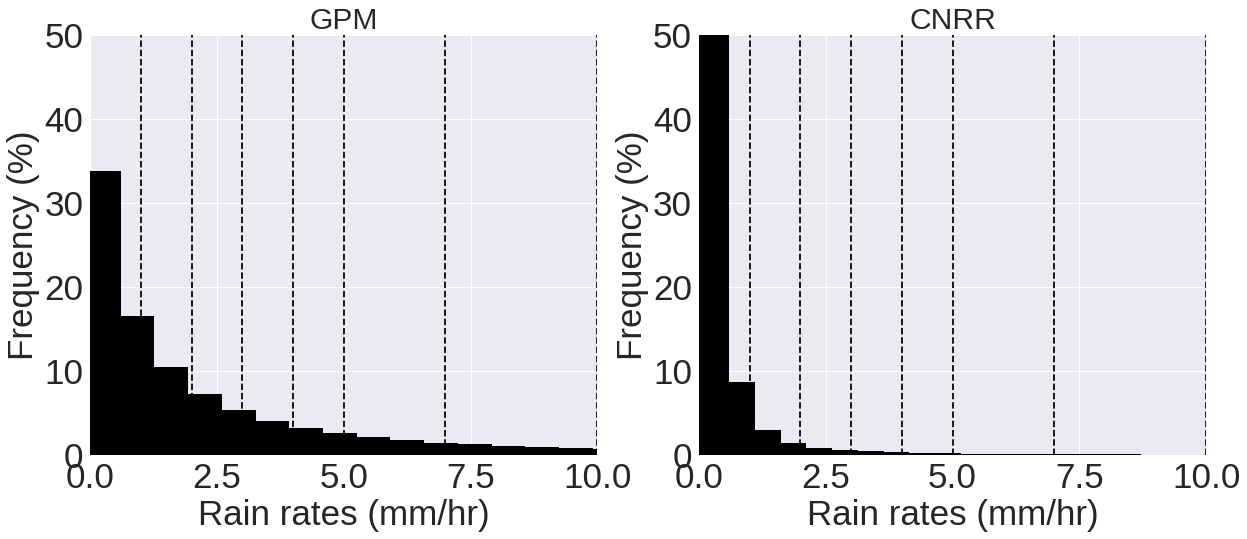

In [22]:
# plot histograms
plot_histograms(heights, heights2,bins, bins2)

# Cloud tracking (tobac)

- are the longest storms captured in both datasets? 

- look at general storm statistics (area,neireast neighbor, intensity, etc) and spatial distribution 

- concentrate on the elevations > 3000 m ASL 

In [2]:
import tobac
import glob
data_file = '/media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/gpm_imerg_201507_tobac_input.nc4'
Precip=iris.load_cube(data_file,'precipitationCal')
dxy,dt=tobac.get_spacings(Precip)

Available coordinates:     ['time', 'longitude', 'latitude']


In [3]:
savedir = '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save'
file = savedir+ '/Features_merged_witharea.h5'
#file= savedir +'/Features_Precip.h5'
Features = pd.read_hdf(file, 'table')

# Calculate area for all Feature chunks 

In [8]:
import glob 
import os
file_list= glob.glob(savedir  + '/Features_Precip??????.h5')  
gpm_dir= '/media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/'
file_list.sort()

In [ ]:
for file in file_list[14::]:
    # read in features 
    Features = pd.read_hdf(file, 'table')
    date= file[len(file)-9 : len(file)- 3]

    # read in data mask 
    f = savedir+ '/Mask_Segmentation_precip'+str(date)+ '.nc'
    mask = iris.load_cube(f, 'segmentation_mask')  
    
    # read in corresponding precip file 
    #f = gpm_dir + 'gpm_imerg_'+ date + '_tobac_input.nc4'
    #precip = iris.load_cube(f, 'precipitationCal')
    
    Features_area= tobac.analysis.calculate_area(Features, mask)
    Features_area.to_hdf(os.path.join(savedir,'Features_area'+date+'.h5'),'table')
    print('....area for', file, 'calculated and saved.')    

/home/juli/anaconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [128]:
Features = tobac.analysis.calculate_area(Features_Precip, Mask)

/home/juli/anaconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [131]:
Features.to_hdf(os.path.join(savedir,'Features_merged_witharea.h5'),'table')

/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [148]:
hist=  tobac.analysis.area_histogram(Features,Mask, bin_edges= np.linspace(np.min(areas), np.max(areas), 30))

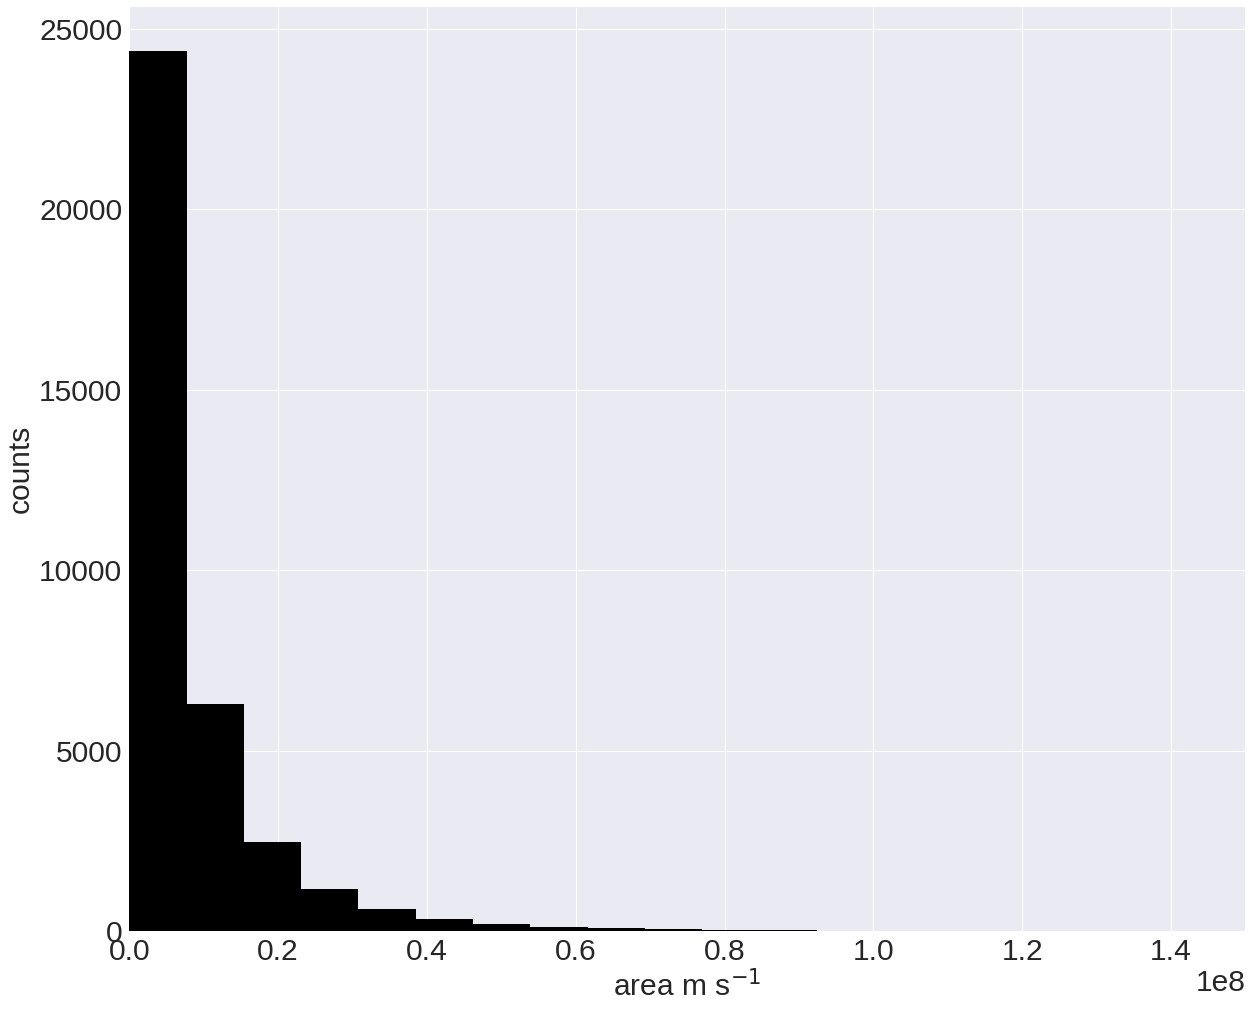

In [202]:
heights = hist[0]
bins = hist[1]

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,
             'ytick.labelsize' : 30})
plt.figure(figsize=(20, 17))

#plt.subplot(2,2,1)
#plt.bar(bins[:-1], hist[0], width = 10, color='k')
plt.ylabel('counts', fontsize= 30)
plt.xlabel('area m s$^{-1}$', fontsize= 30)
plt.hist(areas, bins = 30, color ='k')
plt.xlim(0,150000000)

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/hist_area_GPM.png')

## How much of the total precipitation can be captured by tobac tracking on the datasets? 

- calculate total precip in mask segments compared to total precip in input files!


In [9]:
import glob
# masks
savedir = '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save'
file_list= glob.glob(savedir  + '/Mask_Segmentation_precip??????.nc')  

# precip data 
gpm_dir= '/media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/'

# read in tracking table 
file = savedir + '/Tracks_GPM_2014-2017.h5'
#file = savedir + '/Tracks_GPM_2014-2017_1.5h.h5'
Tracks= pd.read_hdf(file, 'table')
Tracks['timestr']=pd.to_datetime(Tracks['timestr'],format='%Y-%m-%d %H:%M:%S')


# dataframe to store total and system-related precip each month 
contributions = pd.DataFrame(columns=['date', 'total_precip','precip_1mm', 'prec_5mm',  'features_precip','tracked_precip', 'contr%'])




In [91]:
date = '201408'
yearmonth= '2014-08'
file= '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201408.nc'

In [106]:
def calculate_contributions(f, Tracks, gpm_dir, contributions):
    from netCDF4 import Dataset
    
    date= f[len(f)-9: len(f)-3]
    yearmonth= f[len(f)-9: len(f)-5] + '-' + f[len(f)-5: len(f)-3]

    # read in data mask 
    ds = Dataset(f)
    mask = np.array(ds['segmentation_mask'])  
    lats = np.array(ds['lat'])
    lons = np.array(ds['lon'])

    # select features for corresponding month in combined tracks 
    feat_select= Tracks.loc[Tracks['timestr'].dt.strftime('%Y-%m') == yearmonth]
    
    
    # read in corresponding precip file 
    file = gpm_dir + 'gpm_imerg_'+ date + '_tobac_input.nc4'
    ds_precip= Dataset(file)
    precip = np.array(ds_precip['precipitationCal'])
    precip[precip < 0.0 ] = 0 
    ds_precip.close()


    # update mask 
    for frame, values in enumerate(mask):
        frame_idx = frame + feat_select['frame'].values[0]
        timeframe= mask[frame, :, :] # example timestep 
        frame_select =feat_select.loc[feat_select['frame'] == frame_idx]  # all tracked features in this time frame 

        # test if segments in example also are linked features: 
        features = np.unique(timeframe[timeframe > 0])
        tracked_features = frame_select['feature'].values
        for f in features:
            if f not in tracked_features:
                mask[frame, :, :][timeframe == f]= 0 
                

    # calculate contribution
    prec= 0
    total_precip = 0 
    features_precip= 0 
    prec_1mm =0 
    prec_5mm = 0 
    mask_segments = np.array(ds['segmentation_mask'])  
    ds.close()
    for frame, values in enumerate(mask): 
        timestamp= precip[frame, :, :]
        total_precip += np.nansum(timestamp)
        prec_1mm += np.nansum(timestamp[timestamp >= 1]) 
        
        #timestamp[timestamp < 5]= 0 
        prec += np.nansum(timestamp[values > 0])
        prec_5mm += np.nansum(timestamp[timestamp >=5 ])   
        mask_segment = mask_segments[frame,:,:]
        timestamp[timestamp < 5] = 0 
        features_precip += np.nansum(timestamp[mask_segment > 0 ])

    
    # add values to dataframe 
    contr = (prec/total_precip)*100
    #print('contribution of trajectory cells to total precip: '  ,  contr)
    if prec == 0:
        print('........but only contributions through non-linked precip features', file)
        contr= (features_precip/total_precip)*100
    
    data = [str(date), float(total_precip),float(prec_1mm), float(prec_5mm), float(features_precip), float(prec), float(contr)]
    contributions.loc[len(contributions)]= data
    print('contributions updated.')
    
    # save masked precipitation data (precip values of all trajectory cells)
    precip_cells = timestamp[mask_segments[frame,:,:] > 0 ]
    new_precip= xr.DataArray(precip_cells)
    new_precip.to_netcdf(path=savedir + '/Precip_cells' + str(date) + '.nc')
    print('netcdf file saved.')
    
    return contributions 



In [44]:
file= gpm_dir + 'gpm_imerg_201506_tobac_input.nc4'
ds_precip= Dataset(file)
precip = np.array(ds_precip['precipitationCal'])

In [107]:
##########  for all chunks ############################################

for f in file_list:
    print('calculating precip contributions for...', f)
    contributions_extreme = calculate_contributions(f, Tracks, gpm_dir, contributions)


calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201408.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201510.nc
........but only contributions through non-linked precip features /media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/gpm_imerg_201510_tobac_input.nc4
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201612.nc
........but only contributions through non-linked precip features /media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/gpm_imerg_201612_tobac_input.nc4
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/

........but only contributions through non-linked precip features /media/juli/Data/third_pole/tobac/examples/climate-processes-tobac_example_data-b3e69ee/data/gpm/gpm_imerg_201606_tobac_input.nc4
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201607.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201608.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201609.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save/Mask_Segmentation_precip201610.nc
contributions updated.
netcdf file saved.
calculating precip contributions for... /media/juli/El

In [30]:
# save dataframe to HDF5 file 
import os 
contributions.to_hdf(os.path.join(savedir,'precipitation_features_1.5htracks.h5'),'table')


In [14]:
# read in table with contributions 
file = savedir + '/precipitation_features_extreme.h5'
contributions= pd.read_hdf(file, 'table')

In [30]:
feat_select= Tracks.loc[Tracks['timestr'].dt.strftime('%Y-%m') == '201510']
contributions_old = contributions

In [111]:
tracked_precip= contributions.tracked_precip.values
contr= contributions['contr%'].values
total_precip= contributions.total_precip.values
features_precip= contributions.features_precip.values
precip_1mm =contributions.precip_1mm.values
prec_5mm= contributions.prec_5mm.values

In [112]:
contr_tracked = np.sum(tracked_precip)/np.sum(total_precip)
contr_features = np.sum(features_precip)/np.sum(prec_5mm)
print(contr_features*100, contr_tracked*100)

93.94961454309522 23.57057018993462


# How much of the precipitation above 1mm? 

- difference between features_precip and precip_1mm not so large, which means that feature detection captures the largest part of precipitation (rather than that precipitation rates are dominant by a lot of very small rain rates)
- however, the tracked precipitation segments which according to this tracking belong to the MCS, explain only a small part of total and small part of precipitation above 1mm 
- this suggests that most rain rates do not prevail very long time (under 3 hours) 
- how do the results look like for other tracking thresholds? 
- how much of the extreme precipitation is explained by the systems? 

- in general: spatial organization seems to play a role but the temporal persistence is unclear or not so long

In [104]:
contr_tracked = np.nansum(tracked_precip)/np.nansum(precip_1mm)
contr_features = np.nansum(features_precip)/np.nansum(precip_1mm)
print(contr_features*100, contr_tracked*100)

83.60588622754926 30.474147115559962


In [301]:
contributions['date']=pd.to_datetime(contributions['date'],format='%Y%m')

In [8]:
months= []
for i in contributions.date:
    months.append(i.month)


NameError: name 'contributions' is not defined

In [7]:
contributions['month']= months


NameError: name 'months' is not defined

In [316]:
means = contributions.groupby('month').mean()


tracked_precip= means.tracked_precip.values
total_precip= means.total_precip.values
features_precip= means.features_precip.values
precip_1mm =means.precip_1mm.values


## CONTRIBUTIONS GPM : 
 
- tracked/total: 39.31132502446548 features/total: 58.871410694448514 
- tracked/1mm: 56.426721301728435 features/1mm: 84.50289278796473 
- tracked/5mm: 71.87710038043252 features/5mm: 95.16371289033626



## CONTRIBUTION OF PRECIP GPM WITHIN TP:

- tracked/total: 38.186985834337385 - features/total: 57.6110808744695  
- tracked/1mm: 55.0135874087335 features/1mm: 82.99665878707177 
- tracked/5mm: 69.85083772570965 features/5mm: 94.14545561452307


 
## CONTRIBUTIONS CNRR: 

- tracked/total: 29.81430493974125  features/total: 58.25924417373488 
- tracked/1mm: 39.523129739564915 features/1mm: 77.23096918279185 
- tracked/5mm: 49.71470393700792 features/5mm: 89.65732347246939

 

# CONTRIBUTIONS ERA:

- tracked/total: 33.461192587184016  features/total: 39.05876717198338 
- tracked/1mm: 69.30093243035151 features/1mm: 80.89397822703987 
- tracked/5mm: 93.45061128682929 features/5mm: 98.19487278642144




- with looser time threshold: tracked and features much closer for tracked --> this indicates that the temporal continuity is the major point here and not the area contiguity! 
- since spatial contiguous pixels can explain most of the precip, the question is how large the areas are. How much of areas comparable to MCS can we find? area distribution? 

# Comparison environmental impact 

In [140]:
# import tracks for CNRR 
savedir='/media/juli/Data/third_pole/mcs_tracking/CNRR/Save'
file = savedir + '/Tracks_CNRR_2006-2016_storms.h5'
Tracks_cnrr = pd.read_hdf(file, 'table')
Tracks_cnrr['timestr']=pd.to_datetime(Tracks_cnrr['timestr'],format='%Y-%m-%d %H:%M:%S')

In [184]:
# import tracks for GPM 
savedir='/media/juli/Data/third_pole/satellite_data/gpm_v06/Save'
file = savedir + '/Tracks_GPM_2006_2016_storms_tpflag.h5'
Tracks_gpm = pd.read_hdf(file, 'table')
Tracks_gpm['timestr']=pd.to_datetime(Tracks_gpm['timestr'],format='%Y-%m-%d %H:%M:%S')


- total trajectories GPM: 81809 (337409 linked features)
- total trajectories CNRR: 63798 (806576 linked features)


## Lifetime

In [153]:
hist_gpm, bin_edges, bin_centers = tobac.lifetime_histogram(Tracks_gpm,bin_edges=timesteps,density=True)
hist_cnrr, bin_edges, bin_centers= tobac.lifetime_histogram(Tracks_cnrr,bin_edges=timesteps,density=True)

In [147]:
timesteps = np.arange(180,20*60,60)

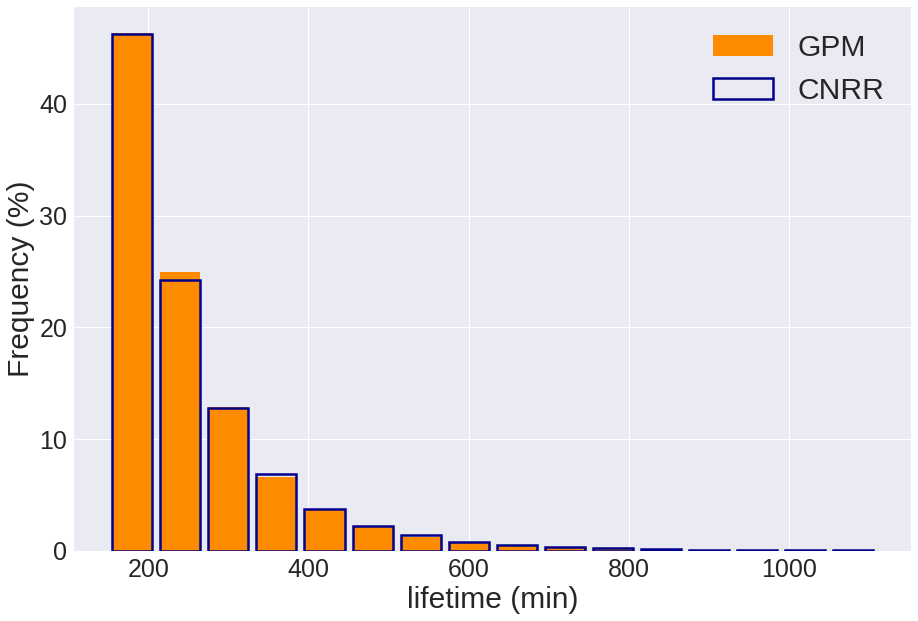

In [160]:
# Lifetimes of tracked features:

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})

#plt.figure(figsize=(20, 17))
fig_lifetime, ax_lifetime= plt.subplots(figsize= (15,10))

#tobac.plot_lifetime_histogram_bar(Tracks_gpm,axes=ax_lifetime,bin_edges=timesteps,density=True,width_bar=50, color='darkorange', label='GPM')
#tobac.plot_lifetime_histogram_bar(Tracks_cnrr,axes=ax_lifetime,bin_edges=timesteps,density=True,width_bar=50, edgecolor='darkblue', color= 'None', linewidth= 2.5,  label='CNRR')


heights_gpm = hist_gpm/ np.sum(hist_gpm)
heights_cnrr = hist_cnrr/ np.sum(hist_cnrr)

plt.bar(timesteps[:-1], heights_gpm*100, width=50, color='darkorange', label='GPM')
plt.bar(timesteps[:-1], heights_cnrr*100, width = 50, edgecolor='darkblue', color= 'None', linewidth= 2.5, label= 'CNRR')

ax_lifetime.set_xlabel('lifetime (min)', fontsize= 30)
ax_lifetime.set_ylabel('Frequency (%)', fontsize = 30)
plt.legend(fontsize= 30)

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/lifetime_CNRR_GPM_2006_2016.png')

#  -> very similar lifetimes for GPM and CNRR 2006 - 2016 ! 

In [12]:
durations= []
cells = []
for c in np.unique(Tracks.cell):
    duration= (np.shape(Tracks.loc[Tracks.cell == c ])[0])* 0.5
    if duration > 6:
        durations.append(duration)
        cells.append(c)

In [19]:
durations= np.array(durations)
durations = np.flip(np.sort(durations), axis =0 )
strongest = durations[0:500]

cells = np.flip(np.sort(cells), axis =0 )
strongest_cells = cells[0:500]


In [20]:
i = 0 
for c in strongest_cells:
    if i == 0:
        df= Tracks.loc[Tracks.cell == c ]
        i+=1 
    else:
        df= df.append(Tracks.loc[Tracks.cell == c ])

In [21]:
subset= df
df.shape

(8190, 14)

In [22]:
import tobac
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

shpfilename= '/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
#reader = shpreader.Reader(shpfilename)

shape_feature = ShapelyFeature(Reader(shpfilename).geometries(),
                                ccrs.PlateCarree(),facecolor='none', edgecolor='black' , linewidth = 2.0)

- the 100 longest storms have lifetimes ranging from 14 to 23.5 hours and originate mostly within the southeast of the TP
- when more lifetimes are included (e.g. the longest 500 from 10 to 23.5 hours), more storms are generated outside of the 3000 boundary 

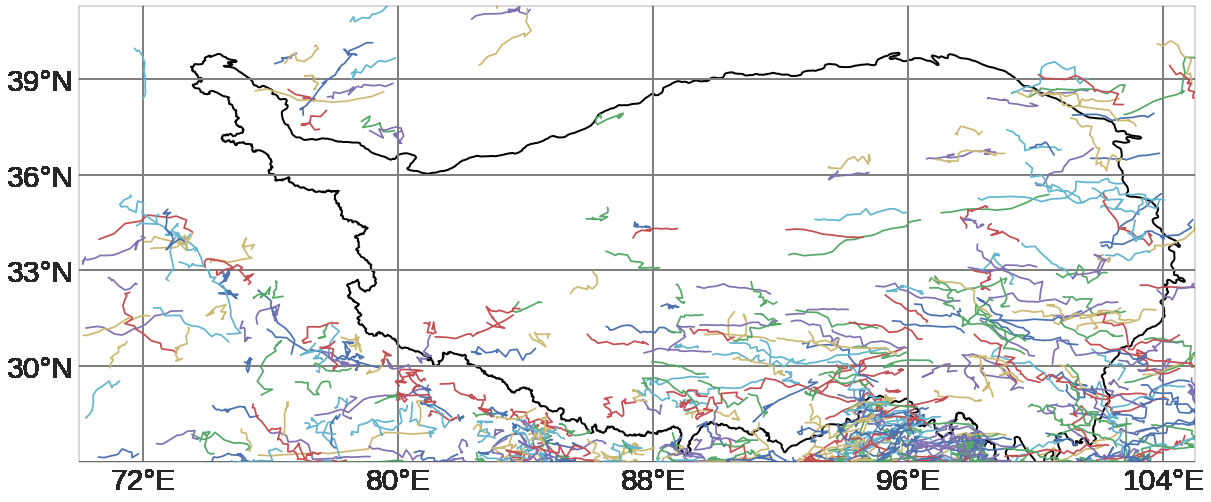

In [24]:
axis_extent= [70, 105, 27.0, 40 ]

# Plot map with all individual tracks:
import tobac
import cartopy.crs as ccrs
fig_map,ax_map=plt.subplots(figsize=(20,20),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map=tobac.map_tracks(subset,axis_extent=axis_extent,axes=ax_map)

# Plot TP boundary polyline from shapefile 
ax_map.add_feature(shape_feature)
plt.ylabel('Lat', fontsize= '25')
plt.xlabel('Lon', fontsize= '25')

plt.savefig('/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Plot/tracks_TP_gpm_longest_500_storms_2014_2016.png')

In [198]:
thresholds= Tracks.threshold_value.values
heights, bins = np.histogram(thresholds)

In [207]:
vals= np.unique(Tracks.threshold_value.values)

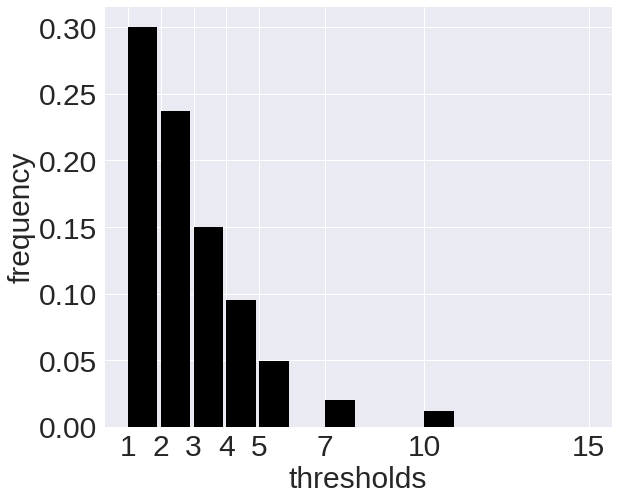

In [213]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,
             'ytick.labelsize' : 30})
plt.figure(figsize=(20, 17))

plt.subplot(2,2,1)
plt.hist(thresholds, bins = vals, width = 0.9, color='k', density= True)
plt.ylabel('frequency', fontsize= 30)
plt.xlabel('thresholds', fontsize= 30)
plt.xticks(vals)

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/hist_thresholds.png')

In [227]:
count = 0 
for c in np.unique(subset.cell):
    d = subset.loc[subset.cell == c ]
    t= np.unique(d.threshold_value)
    if 5 in t:
        count +=1 

only 317 of 8077 storms contain rain rates > 5mm! 

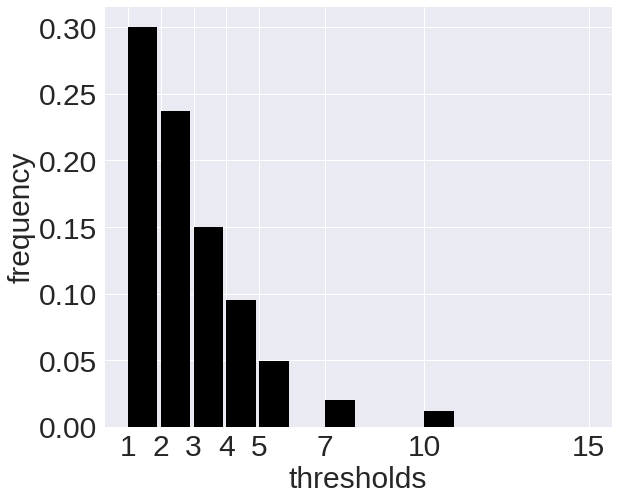

In [222]:
vals= np.unique(subset.threshold_value.values)
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,
             'ytick.labelsize' : 30})
plt.figure(figsize=(20, 17))

plt.subplot(2,2,1)
plt.hist(thresholds, bins = vals, width = 0.9, color='k', density= True)
plt.ylabel('frequency', fontsize= 30)
plt.xlabel('thresholds', fontsize= 30)
plt.xticks(vals)

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/hist_thresholds_longest100.png')


# nearest neighbor

In [1]:
import pandas as pd
savedir = '/media/juli/Data/third_pole/mcs_tracking/CNRR/Save'
file= savedir + '/Features_cnrr_merged_nn.h5'
Features = pd.read_hdf(file, 'table')
Features['min_distance'] /= 1000

In [2]:
savedir = '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save'
file= savedir + '/Features_merged_nn.h5'
Features_gpm = pd.read_hdf(file, 'table')
Features_gpm['min_distance'] /= 1000

In [5]:
heights, bins= tobac.nearestneighbordistance_histogram(Features.loc[Features.threshold_value == 1], bin_edges = np.linspace(0,2000,100))
heights10, bins10= tobac.nearestneighbordistance_histogram(Features.loc[Features.threshold_value >= 10], bin_edges = np.linspace(0,2000,100))


heights_gpm, bins_gpm= tobac.nearestneighbordistance_histogram(Features_gpm.loc[Features_gpm.threshold_value == 1], bin_edges = np.linspace(0,2000,100))
heights10_gpm, bins10_gpm= tobac.nearestneighbordistance_histogram(Features_gpm.loc[Features_gpm.threshold_value >= 10], bin_edges = np.linspace(0,2000,100))




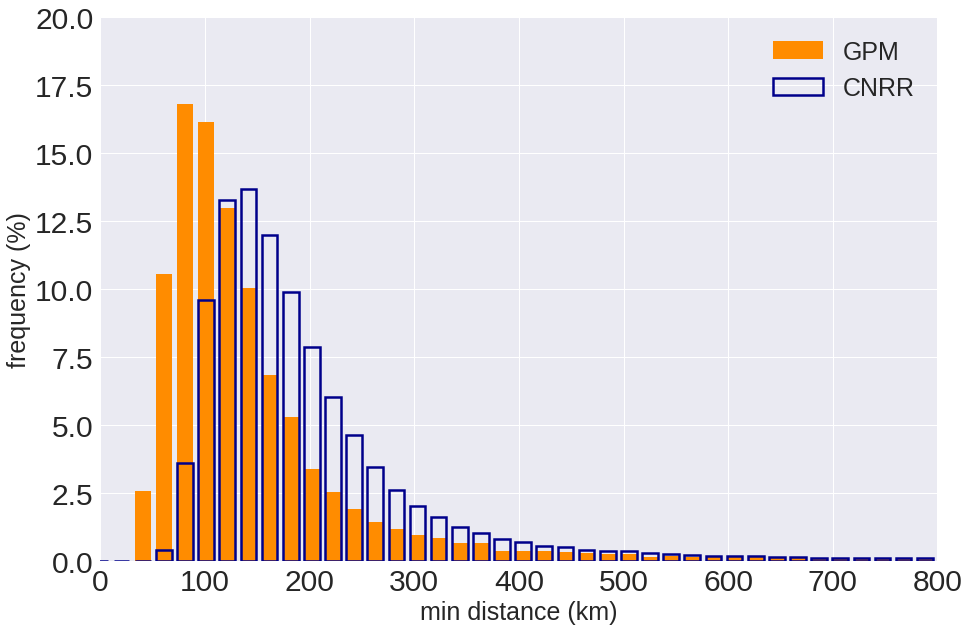

In [6]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,'ytick.labelsize' : 30})
plt.figure(figsize=(15, 10))

height = heights/np.sum(heights)
height10 = heights10/np.sum(heights10)

height_gpm = heights_gpm/np.sum(heights_gpm)
height10_gpm = heights10_gpm/np.sum(heights10_gpm)

#plt.subplot(2,2,1)


#plt.bar(bins_gpm[:-1], height_gpm*100, width = 15, color='darkorange', label= '1mm/hr')
plt.bar(bins10_gpm[:-1], height10_gpm*100, width = 15, color='darkorange',linewidth= 2.5, label= 'GPM')

#plt.bar(bins[:-1], height*100, width = 15, edgecolor='darkblue', color= 'None', label= '1mm/hr')
plt.bar(bins10[:-1], height10*100, width = 15, edgecolor='darkblue', color= 'None', linewidth= 2.5, label= 'CNRR')



plt.ylim(0,20)
plt.xlim(0,800)
plt.xlabel('min distance (km)', fontsize= 25)
plt.ylabel('frequency (%)', fontsize = 25)
plt.legend(fontsize= 25)

# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/histogram_nn_cnrr_gpm_threshold.png')

## Basic statistics

In [ ]:
# look at frequencies of tracked systems based on different thresholds 
for t in parameters_features['threshold']:
    subselect= Track.loc[Track['threshold_value'] == t]
    print(t, subselect.shape[0])

In [ ]:
from tobac.analysis import lifetime_histogram

def plot_lifetime_histogram(track,bin_edges=np.arange(0,200,20),density=False,**kwargs):
    hist, bin_edges,bin_centers = lifetime_histogram(track,bin_edges=bin_edges,density=density)
    plot_hist=plt.plot(bin_centers, hist,**kwargs)
    return plot_hist

def plot_lifetime_histogram_bar(track,axes=None,bin_edges=np.arange(0,100,20),density=False,width_bar=10,shift=0.5,**kwargs):
    hist, bin_edges, bin_centers = lifetime_histogram(track,bin_edges=bin_edges,density=density)
    plot_hist=plt.bar(bin_centers+shift,hist,width=width_bar,**kwargs)
    return plot_hist

def plot_histogram_cellwise(track,bin_edges,variable,quantity,axes=None,density=False,**kwargs):
    hist, bin_edges,bin_centers = histogram_cellwise(track,bin_edges=bin_edges,variable=variable,quantity=quantity,density=density)
    plot_hist=axes.plot(bin_centers, hist,**kwargs)
    return plot_hist

def plot_histogram_featurewise(Track,bin_edges,variable,axes=None,density=False,**kwargs):
    hist, bin_edges, bin_centers = histogram_featurewise(Track,bin_edges=bin_edges,variable=variable,density=density)
    plot_hist=axes.plot(bin_centers, hist,**kwargs)
    return plot_hist


In [ ]:
for t in parameters_features['threshold']:
    # look at  frequencies of tracked systems based on different thresholds 
    subselect= Track.loc[Track['threshold_value'] == t]
    print(t, subselect.shape[0])
    plt.clf()
    
    fig_lifetime,ax_lifetime=plt.subplots()
    tobac.plot_lifetime_histogram_bar(Track,axes=ax_lifetime,bin_edges=np.arange(0,120,10),density=False,width_bar=8)
    ax_lifetime.set_xlabel('lifetime (min)')
    ax_lifetime.set_ylabel('counts')
    plt.show()
    plt.savefig('Plot/lifetime_histogram_threshold_' + str(t) + '.png')
 

## Track stats

In [4]:
# import tracks for GPM 
savedir='/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Save'
#file = savedir + '/Tracks_GPM_2014_2017_updatedframes.h5'
file = savedir + '/Tracks_GPM_2014-2017_v_precip.h5'
Tracks = pd.read_hdf(file, 'table')
Tracks['timestr']=pd.to_datetime(Tracks['timestr'],format='%Y-%m-%d %H:%M:%S')

In [10]:
## This function calculates statistics for each tracked precipitation cell.
# Input: Tracks 
# Returns: pandas dataframe with saved statistics for each tracked cell 

def system_stats(Tracks):
    # dataframe to store system stats 
    mcs = pd.DataFrame(columns=['cell_id','init_time', 'total_precip','mean_rr', 'max_rr', 'lifetime', 'v' , 'max_area', 'mean_area','total_area'])

    for idx, cell in Tracks.groupby('cell'):
        # compute statistics 
        cell_id = cell.cell.values[0]
        init_time = cell.time.values[0]
        total_precip = np.nansum(cell.precip.values)*0.5
        v= np.nanmean(cell.v.values)
        #mean_rr = np.nanmean(cell.mean_rr.values)
        #max_rr= np.nanmax(cell.max_rr.values)
        #lifetime = np.shape(cell)[0]*0.5
        #mean_area = np.nanmean(cell.area.values)
        #max_area = np.nanmax(cell.area.values)
        #total_area = np.nansum(cell.total_area) 

        mean_area = 999
        max_area = 999
        total_area = 999
        mean_rr = 999
        max_rr=999
        lifetime = 999

        # add to dataframe 
        data = [str(cell_id), str(init_time), float(total_precip),float(mean_rr), float(max_rr), float(lifetime), float(v), float(max_area), float(mean_area), float(total_area)]
        mcs.loc[len(mcs)]= data
        print('track stats updated for cell', cell_id)
        
        return mcs 



In [ ]:
mcs = system_stats(Tracks)

# Comparison CNRR and GPM, mean precip

In [143]:
file = '/media/juli/Data/third_pole/CNRR/data/summermean_20062016_total.nc4'
f = '/media/juli/Data/third_pole/CNRR/data/summermean_2006_2016.nc4'
ds = Dataset(file)
coords = Dataset(f)
prcp = np.array(ds['prcp'][0])
#prcp = prcp* 153
lats = np.array(coords['LAT'])
lons = np.array(coords['LON'])


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


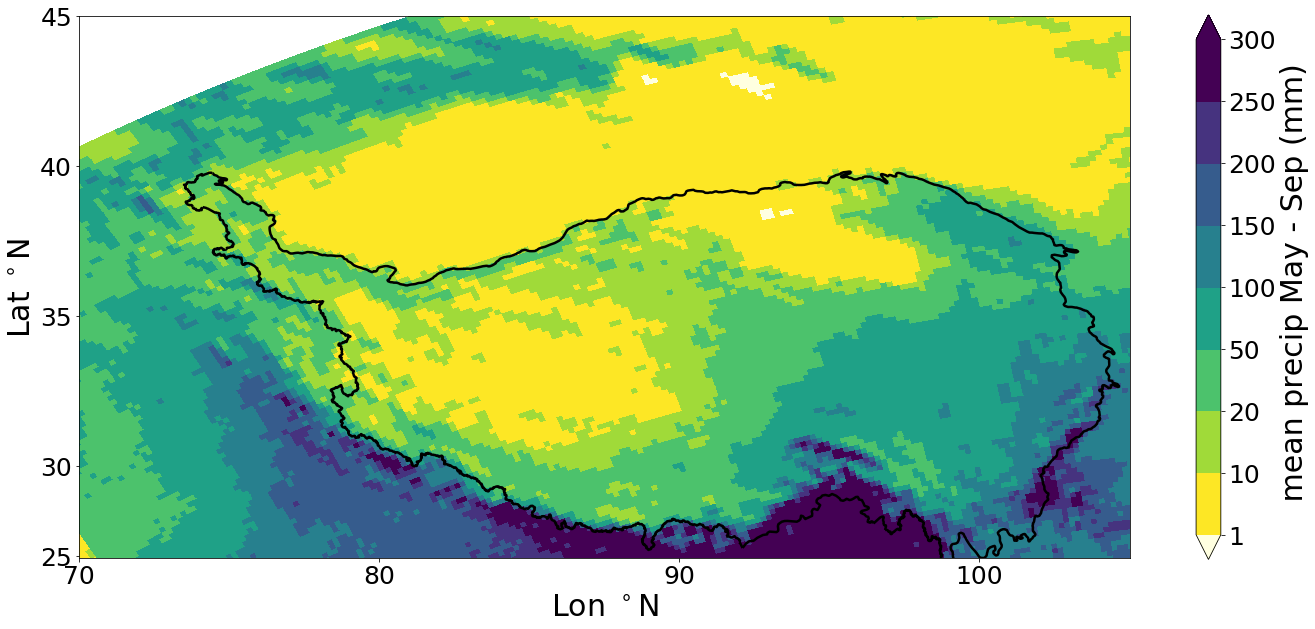

In [145]:
from cartopy import config
import cartopy.crs as ccrs


# set up a map
plt.figure(figsize=(20, 9))
#plt.pcolormesh(lons,lats,prcp)


cmap = plt.cm.get_cmap('viridis_r')
bounds= np.array([0.1, 1 , 2, 3, 5, 7, 10, 20])
bounds= np.array([1, 10, 20, 50, 100, 150, 200, 250, 300])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors= 256)

m = Basemap(projection='cyl', llcrnrlat=26.95,urcrnrlat=44.95, llcrnrlon=70.05, urcrnrlon=105.05,  resolution = 'c')

xi,yi = m(lons,lats)
cs = m.pcolormesh(xi,yi, prcp, cmap=cmap, norm = norm, vmin= 1, vmax = 300 )
cmap.set_under(color='lightyellow')

xlabels=[70, 80, 90, 100]
ylabels= [ 25, 30, 35, 40, 45]

plt.xticks([70, 80,90, 100], xlabels, fontsize=25)
plt.yticks([27,30, 35, 40, 45],ylabels, fontsize=25)
plt.xlabel('Lon $^\circ$N',  fontsize=30)
plt.ylabel('Lat $^\circ$N',  fontsize=30)

# Plot TP boundary polyline from shapefile 
shapefile='/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
TP_bound=m.readshapefile(shapefile, 'boundary', color='black', linewidth=2.5)


cbar = plt.colorbar(extend= 'both')
cbar.set_label(' mean precip May - Sep (mm)', fontsize= 30)
cbar.set_ticks(bounds)
labels = ['0.1', '1', '2', '3', '5', '7', '10', '20']
labels= ['1', '10', '20', '50', '100', '150', '200', '250', '300']
cbar.set_ticklabels(labels)

plt.rcParams.update({'font.size': 25})
plt.tight_layout()


plt.savefig('/media/juli/Elements/comparison/cnrr_summermeanvalues_2006_2016.png')

In [136]:
f = '/media/juli/Data/third_pole/satellite_data/gpm_v06/summermean_20062016_total.nc4'
ds = Dataset(f)
prcp = np.array(ds['precipitationCal'])[0]
lats = np.array(ds['lat'])
lons = np.array(ds['lon'])

#prcp = prcp* 153


/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/home/juli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


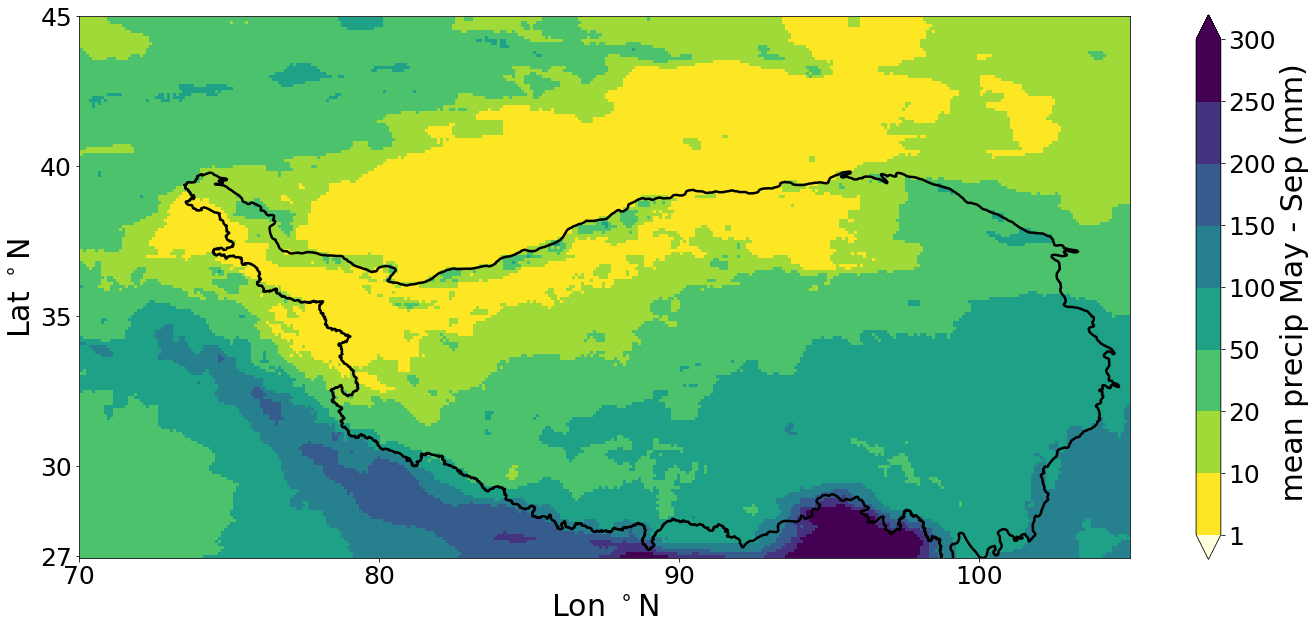

In [141]:

plt.figure(figsize=(20, 9))

cmap = plt.cm.get_cmap('viridis_r')
bounds= np.array([0.1, 1 , 2, 3, 5, 7, 10, 20])
bounds= np.array([1, 10, 20, 50, 100, 150, 200, 250, 300])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors= 256)

m = Basemap(projection='cyl', llcrnrlat=26.95,urcrnrlat=44.95, llcrnrlon=70.05, urcrnrlon=105.05,  resolution = 'c')

lon, lat =np.meshgrid(lons, lats)
xi,yi = m(lon,lat)
cs = m.pcolormesh(xi,yi, prcp.T*0.5, cmap=cmap, norm = norm, vmin= 1, vmax = 300 )
cmap.set_under(color='lightyellow')

xlabels=[70, 80, 90, 100]
ylabels= [ 27, 30, 35, 40, 45]

plt.xticks([70, 80,90, 100], xlabels, fontsize=25)
plt.yticks([27,30, 35, 40, 45],ylabels, fontsize=25)
plt.xlabel('Lon $^\circ$N',  fontsize=30)
plt.ylabel('Lat $^\circ$N',  fontsize=30)

# Plot TP boundary polyline from shapefile 
shapefile='/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
TP_bound=m.readshapefile(shapefile, 'boundary', color='black', linewidth=2.5)


cbar = plt.colorbar(extend= 'both')
cbar.set_label(' mean precip May - Sep (mm)', fontsize= 30)
cbar.set_ticks(bounds)
labels = ['0.1', '1', '2', '3', '5', '7', '10', '20']
labels= ['1', '10', '20', '50', '100', '150', '200', '250', '300']
cbar.set_ticklabels(labels)

plt.rcParams.update({'font.size': 25})
plt.tight_layout()


plt.savefig('/media/juli/Elements/comparison/gpm_summermeanvalues_2006_2016.png')

#  Stats trajectory cells 

In [7]:
gpm= '/media/juli/Data/third_pole/satellite_data/gpm_v06/Save/track_statistics_gpm_tpflag.h5'
gpm_cells= pd.read_hdf(gpm, 'table')
cnrr= '/media/juli/Data/third_pole/mcs_tracking/CNRR/Save/track_statistics_cnrr.h5'
cnrr_cells= pd.read_hdf(cnrr, 'table')

In [235]:
#cnrr_cells.sort_values(by = 'lifetime', ascending = False )

In [5]:
plotdir = '/media/juli/Data/third_pole/mcs_tracking/tobac_plots'

In [267]:
sort = gpm_cells.sort_values(by = 'lifetime', ascending = False)
longest =sort.iloc[0:1000,:]
cells_selected = longest.id.values 

In [268]:
# choose only cells which belong to the longest 100 
df= pd.DataFrame(columns= Tracks_gpm.columns)
for i in cells_selected:
    df = df.append(Tracks_gpm[Tracks_gpm.cell == i])
    

In [63]:
np.mean(gpm_cells.v.values)
np.mean(cnrr_cells.v.values)

5.120826580762694

In [226]:
# intensity 
gpm = gpm_cells.max_rr.values/ gpm_cells.mean_area.values
i = cnrr_cells.max_rr.values/ cnrr_cells.mean_area.values
gpm_cells['intensity'] = gpm 
hist, edges_gpm= np.histogram(gpm , bins = 50, normed = True, range = (i.min(), i.max()))
cnrr_cells['intensity'] = i
hist_cnrr, edges_cnrr= np.histogram(i, bins = 50, density = True )

In [236]:
gpm = gpm_cells.lifetime.values
i = cnrr_cells.lifetime.values
hist, edges_gpm= np.histogram(gpm, bins = 50, normed = True, range = (i.min(), i.max()))
hist_cnrr, edges_cnrr= np.histogram(i, bins = 50, density = True)

## histograms of intensity 


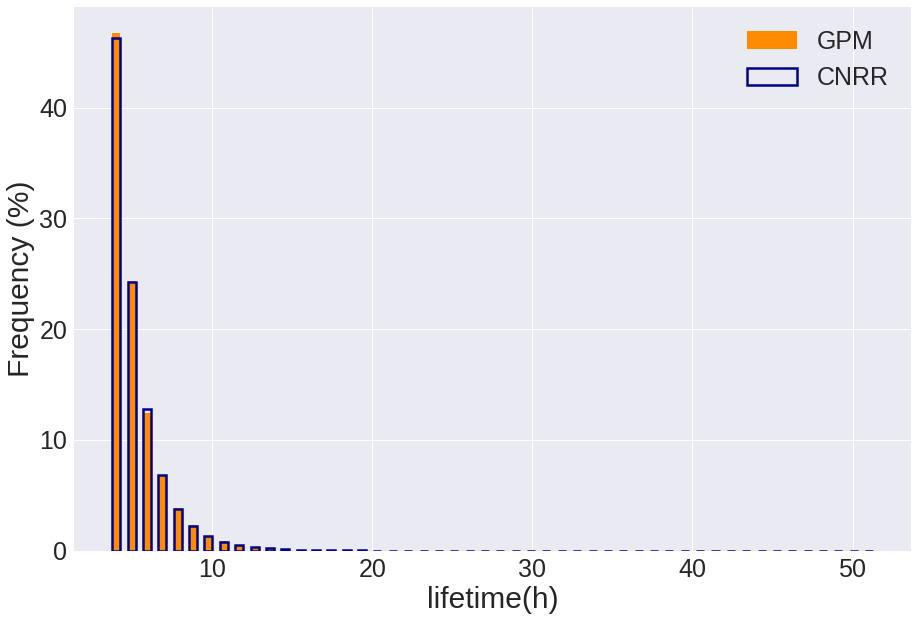

In [239]:
# Lifetimes of tracked features:

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})

#plt.figure(figsize=(20, 17))
fig_lifetime, ax_lifetime= plt.subplots(figsize= (15,10))

xaxis = edges_gpm[:-1]
plt.bar(xaxis, hist/np.nansum(hist)*100, width=0.5, color='darkorange', label= 'GPM')
plt.bar(xaxis, hist_cnrr/np.nansum(hist_cnrr)*100, width=0.5, edgecolor='darkblue', color= 'None', linewidth= 2.5, label= 'CNRR' )


ax_lifetime.set_xlabel('lifetime(h)', fontsize= 30)
ax_lifetime.set_ylabel('Frequency (%)', fontsize = 30)
plt.legend(fontsize= 25)


# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/gpm_cnrr_lifetime.png')

# What are the different characteristics of precipitation features in the two datasets? 

- distributions of mean/max rain rates as well as intensity (normalized by duration or speed), reveal that the peak in the GPM data clearly moves towards the lower values, so: CNRR has more extreme precip values
- CNRR has lower speeds and therefore also a higher environmental impact 

## histograms of mean equivalent radius 

In [130]:

gpm = np.sqrt(gpm_cells.mean_area.values/ np.pi)
gpm_cells['eq_rad'] = gpm
eq_rad = np.sqrt(cnrr_cells.mean_area.values/ np.pi)
cnrr_cells['eq_rad'] = eq_rad

In [232]:

i  =cnrr_cells.eq_rad.values
gpm= gpm_cells.eq_rad.values
hist, edges= np.histogram(gpm, bins = 50, normed = True, range = (i.min(), i.max()))


In [233]:

hist_cnrr, edges= np.histogram(eq_rad, bins = 50, normed = True)


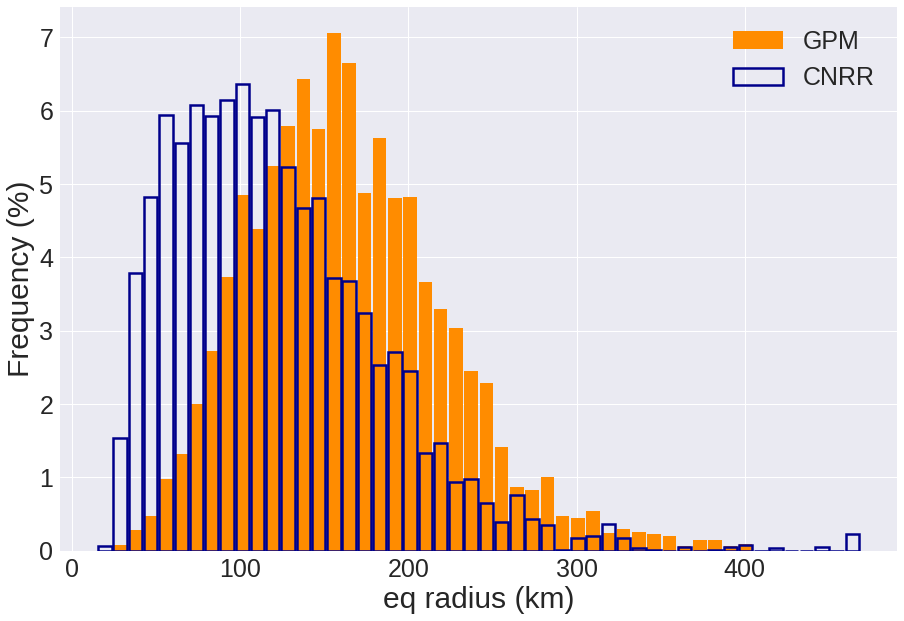

In [235]:
# Lifetimes of tracked features:

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})

#plt.figure(figsize=(20, 17))
fig_lifetime, ax_lifetime= plt.subplots(figsize= (15,10))

xaxis = edges[:-1]
plt.bar(xaxis, hist/np.sum(hist)*100, width=8, color='darkorange', label= 'GPM')
plt.bar(xaxis, hist_cnrr/np.sum(hist_cnrr)*100, width=8, edgecolor='darkblue', color= 'None', linewidth= 2.5, label= 'CNRR' )


ax_lifetime.set_xlabel('eq radius (km)', fontsize= 30)
ax_lifetime.set_ylabel('Frequency (%)', fontsize = 30)
plt.legend(fontsize= 25)


# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/histogram_eq_radius_gpm_cnrr.png')

## size and time of features? 

- CNRR features are generally smaller in size and shorter in lifetime (for the most part, but more extreme values ), in addition to the shorter lifetime the tracking showed that the tracked features contribute less to the total precipitation 

#  Function to select features with heaviest impact 

##  Preselection 

In [276]:
gpm_cells['intensity']= gpm_cells.total_precip.values/ gpm_cells.v.values

In [72]:
def heavy_impact(cells):
    s1= cells[cells['features>5mm'] > 5] # 5mm/hr threshold feature in min 6 timesteps
    s2= s1[s1.total_precip >= np.percentile(s1.total_precip.values, 95)]
    #s2= s1[s1.max_rr >= np.percentile(s1.max_rr.values, 90)]
    #s2 = s1[s1.eq_rad >= 100 ] # mean equivalent radius > 100 km 
    # select only systems within or crossing the TP 
    #s3= s2[s2.TP_flag > 1   ]
    # sort values 
    df = s2.sort_values(by = ['total_precip'], ascending= False)
    return df

In [73]:
cells_selected = heavy_impact(gpm_cells)
cells_selected.shape

(685, 12)

In [508]:
#cells_tp = gpm_cells[gpm_cells.TP_flag == 2  ]
#cells_tp.shape

- first selection of potential mcs candidates 
- at least one feature > 5 
- at least one feature, eq radius is > 100 km 
- choose only storms within or crossing the TP boundary 


- then sort after precip, max rain rate, intensity 

In [10]:
#intensity = gpm_cells.max_rr.values/gpm_cells.max 

- concentrate on events within TP 3000 boundary!! 
- visualization of heavy impact: with NCEP and/or DPR ! 


# Function to compare system to CNRR 

## Import Tracks

In [4]:
# import tracks for CNRR 
savedir='/media/juli/Data/third_pole/mcs_tracking/CNRR/Save'
file = savedir + '/Tracks_CNRR_2006_2016_updatedframes.h5'
file = savedir + '/Tracks_CNRR_2006-2016_storms.h5'
Tracks_cnrr = pd.read_hdf(file, 'table')
Tracks_cnrr['timestr']=pd.to_datetime(Tracks_cnrr['timestr'],format='%Y-%m-%d %H:%M:%S')

In [5]:
# import tracks for GPM 
savedir='/media/juli/Data/third_pole/satellite_data/gpm_v06/Save'
file = savedir + '/Tracks_GPM_2006_2016_storms_tpflag.h5'
Tracks_gpm = pd.read_hdf(file, 'table')
Tracks_gpm['timestr']=pd.to_datetime(Tracks_gpm['timestr'],format='%Y-%m-%d %H:%M:%S')

In [26]:
# import tracks for ERA 

savedir='/media/juli/Elements/ERA5/monthly/Save'
data_dir='/media/juli/Elements/ERA5/monthly/'
file = savedir + '/Tracks_ERA5_2006_2016_new.h5'
Tracks_era = pd.read_hdf(file, 'table')
Tracks_era['timestr']=pd.to_datetime(Tracks_era['timestr'],format='%Y-%m-%d %H:%M:%S')

In [6]:
Features_era = pd.read_hdf('/media/juli/Elements/ERA5/monthly/Save/Features_merged.h5', 'table')

## Import CNRR merged features and GPM tracking

In [39]:
# read in HDF5 files with saved features
savedir = '/media/juli/Data/third_pole/mcs_tracking/CNRR/Save/'
file_list= glob.glob(savedir  + '/2006_2016/Features_CNRR_??????.h5')  
file_list.sort()
print('nr. of monthly feature files:', len(file_list))

nr. of monthly feature files: 132


In [40]:
i = 0 
frames = 0 

for file in file_list: 
    if i == 0:
        Features = pd.read_hdf(file, 'table')
        # read in data mask with segments for tracked cells 
        date= file[len(file)-9: len(file)-3]
        ds = Dataset(savedir+ '/Mask_Segmentation_precip'+date+'.nc')
        mask = np.array(ds['segmentation_mask'])  
        # update total nr of frames 
        frames += np.shape(mask)[0] -1
        i = 1 
        print('file for: ',date, 'rows: ',Features.shape[0], 'frames: ', frames)

    else:
        features = pd.read_hdf(file, 'table')
        # update frame number and make sure they are sequential
        features['frame'] = features['frame']  + frames
        # append dataframes 
        Features = Features.append(features, ignore_index=True)      
        # read in data mask with segments for tracked cells 
        date= file[len(file)-9: len(file)-3]
        ds = Dataset(savedir+ '/Mask_Segmentation_precip'+date+'.nc')
        mask = np.array(ds['segmentation_mask'])  
        #update total nr of frames
        frames += np.shape(mask)[0]
        print('file for: ',date, 'rows: ',features.shape[0], 'frames: ', frames)

file for:  200601 rows:  1659 frames:  743
file for:  200602 rows:  2766 frames:  1415
file for:  200603 rows:  4373 frames:  2159
file for:  200604 rows:  4871 frames:  2879
file for:  200605 rows:  9136 frames:  3623
file for:  200606 rows:  10698 frames:  4343
file for:  200607 rows:  13718 frames:  5087
file for:  200608 rows:  12957 frames:  5831
file for:  200609 rows:  9647 frames:  6551
file for:  200610 rows:  4919 frames:  7295
file for:  200611 rows:  3040 frames:  8015
file for:  200612 rows:  1726 frames:  8759
file for:  200701 rows:  912 frames:  9503
file for:  200702 rows:  4545 frames:  10175
file for:  200703 rows:  4306 frames:  10919
file for:  200704 rows:  5761 frames:  11639
file for:  200705 rows:  8054 frames:  12383
file for:  200706 rows:  14491 frames:  13103
file for:  200707 rows:  18395 frames:  13847
file for:  200708 rows:  15439 frames:  14591
file for:  200709 rows:  12662 frames:  15311
file for:  200710 rows:  5598 frames:  16055
file for:  200711 

/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


file for:  200809 rows:  12635 frames:  24095
file for:  200810 rows:  6107 frames:  24839
file for:  200811 rows:  1634 frames:  25559
file for:  200812 rows:  1567 frames:  26303
file for:  200901 rows:  2202 frames:  27047
file for:  200902 rows:  2765 frames:  27719
file for:  200903 rows:  4037 frames:  28463
file for:  200904 rows:  6027 frames:  29183
file for:  200905 rows:  9103 frames:  29927
file for:  200906 rows:  9476 frames:  30647
file for:  200907 rows:  16891 frames:  31391
file for:  200908 rows:  16439 frames:  32135
file for:  200909 rows:  10513 frames:  32855
file for:  200910 rows:  5778 frames:  33599
file for:  200911 rows:  3207 frames:  34319
file for:  200912 rows:  1767 frames:  35063
file for:  201001 rows:  1255 frames:  35807
file for:  201002 rows:  3379 frames:  36479
file for:  201003 rows:  4471 frames:  37223
file for:  201004 rows:  6159 frames:  37943
file for:  201005 rows:  9600 frames:  38687
file for:  201006 rows:  12895 frames:  39407
file 

In [53]:
# Tracks_cnrr
# Track_gpm
Features_cnrr = Features
Features_cnrr['timestr']=pd.to_datetime(Features_cnrr['timestr'],format='%Y-%m-%d %H:%M:%S')

## loop through all heavy impact cells 



In [8]:
def heavy_impact(cells):
    s1= cells[cells['features>5mm'] > 5] # 5mm/hr threshold feature in min 6 timesteps
    s2 = s1[s1.total_precip >= np.percentile(s1.total_precip.values, 90) ] # mean equivalent radius > 100 km 
    df = s2.sort_values(by = ['lifetime'], ascending= False)
    return df

In [9]:
cells_selected = heavy_impact(gpm_cells)
cells_selected.shape


(1369, 12)

# 2000 storms..

## highest precip amount

In [16]:
cells= gpm_cells
cells = cells[cells['features>5mm'] > 5]
cells =cells.sort_values(by = 'total_precip', ascending = False)[0:2000]


cells_cnrr= cnrr_cells
cells_cnrr = cells_cnrr[cells_cnrr['features>5mm'] > 5]
cells_cnrr =cells_cnrr.sort_values(by = 'total_precip', ascending = False )[0:2000]

## largest area

In [42]:
cells= gpm_cells
cells =cells.sort_values(by = 'max_area', ascending = False)[0:2000]

cells_cnrr= cnrr_cells
cells_cnrr =cells_cnrr.sort_values(by = 'max_area', ascending= False)[0:2000]

In [27]:
Features_cnrr = Tracks_era
Features_cnrr['timestr']=pd.to_datetime(Features_cnrr['timestr'],format='%Y-%m-%d %H:%M:%S')

In [44]:
Features_cnrr= Features
Features_cnrr['timestr']=pd.to_datetime(Features_cnrr['timestr'],format='%Y-%m-%d %H:%M:%S')

In [43]:
cells_selected = cells

In [45]:
for cell_index,i in enumerate(cells_selected.id.values):
    tracks = Tracks_gpm[Tracks_gpm.cell == i ]
    
    # extract time information about feature with largest area
    
    maturity= tracks[tracks.area == np.nanmax(tracks.area.values)].timestr.values[0]
    print('comparing for cell', i, 'in', maturity)
    year= str(maturity.astype('datetime64[s]').item().year)
    month= str(maturity.astype('datetime64[s]').item().month)
    if len(month)== 1:
        month= '0' + month
    day= str(maturity.astype('datetime64[s]').item().day)
    if len(day)== 1:
        day = '0' + day
    hour= int(maturity.astype('datetime64[s]').item().hour)
    
    # extract spatial information about system in GPM tracks
    center_lon= tracks[tracks.area == np.nanmax(tracks.area.values)].longitude.values[0]
    center_lat = tracks[tracks.area == np.nanmax(tracks.area.values)].latitude.values[0]
   
    # apply time mask to select rows in CNRR features dataframe for same timestep(+- 1 )
    features_cnrr= Features_cnrr.loc[Features_cnrr['timestr'].dt.strftime('%Y-%m-%d') == year+'-'+ month+'-'+ day]
    times = np.unique(features_cnrr.timestr.values)
    for idx,ti in enumerate(times):
        if ti.astype('datetime64[s]').item().hour == hour:
            if idx == 0:
                start_date= times[idx]
            else:
                start_date = times[idx - 1]
            if idx < np.shape(times)[0]- 2:
                end_date = times[idx + 1]
            else:
                end_date = times[idx]
                      
    mask = (Features_cnrr['timestr'] >= start_date) & (Features_cnrr['timestr'] <= end_date)
    identified_features_cnrr = Features_cnrr.loc[mask]  
                                 
    # look in this subdataframe which features are available within acceptable boundary    
    flag = 0 
    max_distance= 100 
    closest= 100 
    for idx, lon in enumerate(identified_features_cnrr.longitude.values):
        # extract spatial information about system in CNRR features
        lat = identified_features_cnrr.latitude.values[idx]
        # calculate distance 
        distance= calculate_distance(center_lon, lon, center_lat, lat)
        if distance < closest and distance < max_distance:
            flag += 1 
            closest= distance
            # extract threshold value of CNRR feature 
            c_t = identified_features_cnrr.threshold_value.values[idx]
                   
        else: 
            flag += 0 

    if flag >= 1:
        o = tracks[tracks.area == np.nanmax(tracks.area.values)]
        # add flag in tracking dataframe that features also
        print('here is a feature found which could be similar', flag)
        cells_selected.at[cells_selected[cells_selected.id== i].index[0],'cnrr_flag_t'] = c_t
        cells_selected.at[cells_selected[cells_selected.id== i].index[0],'threshold'] = o.threshold_value.values[0]
        cells_selected.at[cells_selected[cells_selected.id== i].index[0],'distance'] = closest
        # add further statistics about feature 
    else:
        print('no similar feature found in CNRR')
        cells_selected.at[cells_selected[cells_selected.id== i].index[0], 'cnrr_flag_t'] = flag
        # add flag in tracking dataframe that no feature is found 

comparing for cell 782801 in 2016-07-21T18:30:00.000000000
here is a feature found which could be similar 3
comparing for cell 575923 in 2013-08-29T08:30:00.000000000
no similar feature found in CNRR
comparing for cell 782725 in 2016-07-21T17:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 109897 in 2007-07-23T18:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 784607 in 2016-07-25T21:30:00.000000000
no similar feature found in CNRR
comparing for cell 782914 in 2016-07-21T21:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 123849 in 2007-08-28T20:00:00.000000000
no similar feature found in CNRR
comparing for cell 785069 in 2016-07-27T01:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 784590 in 2016-07-25T21:30:00.000000000
no similar feature found in CNRR
comparing for cell 782859 in 2016-07-21T21:00:00.000000000
here is a feature found which cou

no similar feature found in CNRR
comparing for cell 109857 in 2007-07-23T18:30:00.000000000
no similar feature found in CNRR
comparing for cell 203854 in 2008-10-02T02:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 499680 in 2012-08-27T19:30:00.000000000
no similar feature found in CNRR
comparing for cell 485595 in 2012-07-24T12:00:00.000000000
no similar feature found in CNRR
comparing for cell 795060 in 2016-08-22T15:30:00.000000000
here is a feature found which could be similar 2
comparing for cell 782804 in 2016-07-21T17:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 333440 in 2010-07-31T07:30:00.000000000
no similar feature found in CNRR
comparing for cell 785045 in 2016-07-26T23:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 152951 in 2008-05-02T22:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 331357 in 2010-07-27T09:30:00.000000000


here is a feature found which could be similar 3
comparing for cell 633743 in 2014-07-29T09:30:00.000000000
no similar feature found in CNRR
comparing for cell 525026 in 2013-03-09T10:00:00.000000000
no similar feature found in CNRR
comparing for cell 633828 in 2014-07-29T10:30:00.000000000
no similar feature found in CNRR
comparing for cell 443088 in 2012-01-04T00:00:00.000000000
no similar feature found in CNRR
comparing for cell 566395 in 2013-08-02T16:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 331231 in 2010-07-27T09:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 109717 in 2007-07-23T12:30:00.000000000
no similar feature found in CNRR
comparing for cell 333448 in 2010-07-31T07:30:00.000000000
no similar feature found in CNRR
comparing for cell 783076 in 2016-07-22T07:00:00.000000000
no similar feature found in CNRR
comparing for cell 182789 in 2008-07-29T23:00:00.000000000
here is a feature found which co

no similar feature found in CNRR
comparing for cell 183358 in 2008-07-31T02:00:00.000000000
no similar feature found in CNRR
comparing for cell 633388 in 2014-07-28T12:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 109801 in 2007-07-23T13:30:00.000000000
no similar feature found in CNRR
comparing for cell 445870 in 2012-02-03T10:00:00.000000000
no similar feature found in CNRR
comparing for cell 642854 in 2014-08-21T20:30:00.000000000
no similar feature found in CNRR
comparing for cell 194008 in 2008-08-25T17:00:00.000000000
no similar feature found in CNRR
comparing for cell 366883 in 2011-01-10T21:30:00.000000000
no similar feature found in CNRR
comparing for cell 719810 in 2015-08-28T15:30:00.000000000
no similar feature found in CNRR
comparing for cell 487403 in 2012-07-28T07:00:00.000000000
no similar feature found in CNRR
comparing for cell 79038 in 2007-04-02T21:00:00.000000000
no similar feature found in CNRR
comparing for cell 330065 in 201

no similar feature found in CNRR
comparing for cell 517608 in 2013-01-06T20:30:00.000000000
no similar feature found in CNRR
comparing for cell 779928 in 2016-07-16T12:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 42343 in 2006-07-28T19:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 771808 in 2016-06-30T10:30:00.000000000
here is a feature found which could be similar 2
comparing for cell 720061 in 2015-08-29T09:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 785034 in 2016-07-26T19:00:00.000000000
no similar feature found in CNRR
comparing for cell 96800 in 2007-06-21T21:00:00.000000000
no similar feature found in CNRR
comparing for cell 185106 in 2008-08-04T22:30:00.000000000
no similar feature found in CNRR
comparing for cell 5580 in 2006-02-11T10:30:00.000000000
no similar feature found in CNRR
comparing for cell 390163 in 2011-06-02T00:00:00.000000000
no similar feature f

no similar feature found in CNRR
comparing for cell 499815 in 2012-08-28T13:30:00.000000000
no similar feature found in CNRR
comparing for cell 720181 in 2015-08-29T19:00:00.000000000
no similar feature found in CNRR
comparing for cell 720131 in 2015-08-29T17:00:00.000000000
no similar feature found in CNRR
comparing for cell 111752 in 2007-07-27T16:00:00.000000000
no similar feature found in CNRR
comparing for cell 780452 in 2016-07-17T12:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 112177 in 2007-07-28T14:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 563799 in 2013-07-25T11:00:00.000000000
no similar feature found in CNRR
comparing for cell 564013 in 2013-07-25T22:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 252652 in 2009-07-27T02:30:00.000000000
no similar feature found in CNRR
comparing for cell 575453 in 2013-08-27T18:00:00.000000000
here is a feature found which co

no similar feature found in CNRR
comparing for cell 180710 in 2008-07-25T14:30:00.000000000
no similar feature found in CNRR
comparing for cell 320104 in 2010-07-01T14:00:00.000000000
no similar feature found in CNRR
comparing for cell 485675 in 2012-07-24T17:00:00.000000000
no similar feature found in CNRR
comparing for cell 719385 in 2015-08-27T11:00:00.000000000
no similar feature found in CNRR
comparing for cell 265873 in 2009-09-01T20:00:00.000000000
no similar feature found in CNRR
comparing for cell 193772 in 2008-08-25T11:00:00.000000000
no similar feature found in CNRR
comparing for cell 345701 in 2010-08-27T08:00:00.000000000
no similar feature found in CNRR
comparing for cell 795569 in 2016-08-24T09:00:00.000000000
no similar feature found in CNRR
comparing for cell 357901 in 2010-09-29T22:00:00.000000000
no similar feature found in CNRR
comparing for cell 563662 in 2013-07-25T06:00:00.000000000
no similar feature found in CNRR
comparing for cell 111754 in 2007-07-27T16:00:0

here is a feature found which could be similar 1
comparing for cell 331535 in 2010-07-27T14:30:00.000000000
here is a feature found which could be similar 3
comparing for cell 499108 in 2012-08-26T06:00:00.000000000
no similar feature found in CNRR
comparing for cell 654014 in 2014-10-02T08:00:00.000000000
no similar feature found in CNRR
comparing for cell 333774 in 2010-07-31T18:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 485345 in 2012-07-24T00:30:00.000000000
no similar feature found in CNRR
comparing for cell 771961 in 2016-06-30T14:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 645521 in 2014-08-31T09:30:00.000000000
no similar feature found in CNRR
comparing for cell 124256 in 2007-08-29T17:00:00.000000000
no similar feature found in CNRR
comparing for cell 112196 in 2007-07-28T14:30:00.000000000
no similar feature found in CNRR
comparing for cell 252657 in 2009-07-27T02:30:00.000000000
here is a featur

here is a feature found which could be similar 2
comparing for cell 264291 in 2009-08-27T14:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 109881 in 2007-07-23T20:30:00.000000000
no similar feature found in CNRR
comparing for cell 719893 in 2015-08-28T20:00:00.000000000
here is a feature found which could be similar 3
comparing for cell 424431 in 2011-08-31T21:00:00.000000000
no similar feature found in CNRR
comparing for cell 180702 in 2008-07-25T12:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 248592 in 2009-07-15T22:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 329030 in 2010-07-22T14:00:00.000000000
no similar feature found in CNRR
comparing for cell 32573 in 2006-07-01T20:30:00.000000000
no similar feature found in CNRR
comparing for cell 180974 in 2008-07-25T21:30:00.000000000
no similar feature found in CNRR
comparing for cell 645472 in 2014-08-31T02:00:00.000000000
n

no similar feature found in CNRR
comparing for cell 561699 in 2013-07-21T08:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 642775 in 2014-08-21T13:30:00.000000000
no similar feature found in CNRR
comparing for cell 782220 in 2016-07-20T19:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 803485 in 2016-09-20T21:30:00.000000000
no similar feature found in CNRR
comparing for cell 191263 in 2008-08-18T20:00:00.000000000
no similar feature found in CNRR
comparing for cell 565609 in 2013-07-31T07:00:00.000000000
here is a feature found which could be similar 3
comparing for cell 228244 in 2009-05-02T11:30:00.000000000
no similar feature found in CNRR
comparing for cell 315771 in 2010-06-21T05:00:00.000000000
no similar feature found in CNRR
comparing for cell 487898 in 2012-07-29T04:00:00.000000000
no similar feature found in CNRR
comparing for cell 159523 in 2008-06-01T21:00:00.000000000
no similar feature found in CNRR

here is a feature found which could be similar 3
comparing for cell 182940 in 2008-07-30T06:30:00.000000000
no similar feature found in CNRR
comparing for cell 445858 in 2012-02-03T09:30:00.000000000
no similar feature found in CNRR
comparing for cell 458963 in 2012-05-02T12:30:00.000000000
no similar feature found in CNRR
comparing for cell 796573 in 2016-08-27T09:00:00.000000000
no similar feature found in CNRR
comparing for cell 675127 in 2015-04-01T16:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 565729 in 2013-07-31T11:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 552535 in 2013-06-29T17:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 196090 in 2008-08-30T17:30:00.000000000
no similar feature found in CNRR
comparing for cell 720143 in 2015-08-29T16:30:00.000000000
no similar feature found in CNRR
comparing for cell 395826 in 2011-06-19T11:00:00.000000000
here is a featur

no similar feature found in CNRR
comparing for cell 193287 in 2008-08-23T22:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 317282 in 2010-06-24T00:00:00.000000000
no similar feature found in CNRR
comparing for cell 803742 in 2016-09-21T20:30:00.000000000
no similar feature found in CNRR
comparing for cell 776433 in 2016-07-09T06:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 705975 in 2015-07-20T17:00:00.000000000
no similar feature found in CNRR
comparing for cell 202352 in 2008-09-24T14:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 499431 in 2012-08-27T10:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 445874 in 2012-02-03T11:00:00.000000000
no similar feature found in CNRR
comparing for cell 37549 in 2006-07-14T16:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 363997 in 2010-11-08T19:00:00.000000000
h

here is a feature found which could be similar 2
comparing for cell 594671 in 2014-02-03T08:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 501591 in 2012-09-01T14:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 474466 in 2012-06-30T11:30:00.000000000
no similar feature found in CNRR
comparing for cell 41625 in 2006-07-26T13:30:00.000000000
here is a feature found which could be similar 2
comparing for cell 29610 in 2006-06-24T05:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 213589 in 2009-01-03T14:30:00.000000000
no similar feature found in CNRR
comparing for cell 564104 in 2013-07-26T07:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 74378 in 2007-03-03T09:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 719818 in 2015-08-28T16:30:00.000000000
here is a feature found which could be similar 1
comparing for 

no similar feature found in CNRR
comparing for cell 183245 in 2008-07-30T17:00:00.000000000
no similar feature found in CNRR
comparing for cell 498719 in 2012-08-24T21:00:00.000000000
no similar feature found in CNRR
comparing for cell 330981 in 2010-07-26T21:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 566163 in 2013-08-01T18:00:00.000000000
no similar feature found in CNRR
comparing for cell 112238 in 2007-07-28T14:00:00.000000000
no similar feature found in CNRR
comparing for cell 497880 in 2012-08-22T13:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 791916 in 2016-08-13T09:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 195963 in 2008-08-30T10:00:00.000000000
no similar feature found in CNRR
comparing for cell 715062 in 2015-08-15T04:30:00.000000000
no similar feature found in CNRR
comparing for cell 782887 in 2016-07-22T03:30:00.000000000
here is a feature found which co

no similar feature found in CNRR
comparing for cell 263890 in 2009-08-26T16:30:00.000000000
no similar feature found in CNRR
comparing for cell 263997 in 2009-08-26T21:30:00.000000000
no similar feature found in CNRR
comparing for cell 746119 in 2016-04-02T10:00:00.000000000
no similar feature found in CNRR
comparing for cell 782555 in 2016-07-21T13:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 709318 in 2015-07-31T15:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 342889 in 2010-08-21T01:30:00.000000000
no similar feature found in CNRR
comparing for cell 771905 in 2016-06-30T13:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 484535 in 2012-07-21T18:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 373739 in 2011-03-03T23:00:00.000000000
no similar feature found in CNRR
comparing for cell 746145 in 2016-04-02T09:30:00.000000000
no similar featu

no similar feature found in CNRR
comparing for cell 191204 in 2008-08-18T16:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 645480 in 2014-08-31T06:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 264918 in 2009-08-29T22:30:00.000000000
no similar feature found in CNRR
comparing for cell 720037 in 2015-08-29T09:30:00.000000000
no similar feature found in CNRR
comparing for cell 123105 in 2007-08-26T19:30:00.000000000
no similar feature found in CNRR
comparing for cell 112359 in 2007-07-28T21:30:00.000000000
no similar feature found in CNRR
comparing for cell 83994 in 2007-05-02T22:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 553005 in 2013-06-30T16:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 703677 in 2015-07-12T20:30:00.000000000
no similar feature found in CNRR
comparing for cell 90943 in 2007-06-02T20:30:00.000000000
here is a feature 

no similar feature found in CNRR
comparing for cell 262931 in 2009-08-24T07:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 565668 in 2013-07-31T10:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 640306 in 2014-08-15T03:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 640485 in 2014-08-15T10:00:00.000000000
no similar feature found in CNRR
comparing for cell 771946 in 2016-06-30T14:00:00.000000000
no similar feature found in CNRR
comparing for cell 382271 in 2011-05-02T08:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 358543 in 2010-10-02T22:00:00.000000000
no similar feature found in CNRR
comparing for cell 333434 in 2010-07-31T07:30:00.000000000
no similar feature found in CNRR
comparing for cell 123441 in 2007-08-27T18:00:00.000000000
no similar feature found in CNRR
comparing for cell 180291 in 2008-07-24T12:00:00.000000000
no similar featu

here is a feature found which could be similar 1
comparing for cell 433083 in 2011-09-26T19:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 330549 in 2010-07-25T18:30:00.000000000
no similar feature found in CNRR
comparing for cell 619447 in 2014-06-22T05:30:00.000000000
no similar feature found in CNRR
comparing for cell 113682 in 2007-08-01T12:30:00.000000000
no similar feature found in CNRR
comparing for cell 109228 in 2007-07-22T09:30:00.000000000
no similar feature found in CNRR
comparing for cell 769810 in 2016-06-25T14:00:00.000000000
no similar feature found in CNRR
comparing for cell 41620 in 2006-07-26T14:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 595293 in 2014-02-12T23:30:00.000000000
no similar feature found in CNRR
comparing for cell 182866 in 2008-07-29T20:30:00.000000000
here is a feature found which could be similar 2
comparing for cell 40176 in 2006-07-21T16:30:00.000000000
no similar feature

here is a feature found which could be similar 1
comparing for cell 367161 in 2011-01-15T04:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 29931 in 2006-06-25T09:00:00.000000000
no similar feature found in CNRR
comparing for cell 646069 in 2014-09-01T11:00:00.000000000
no similar feature found in CNRR
comparing for cell 534280 in 2013-05-01T15:00:00.000000000
no similar feature found in CNRR
comparing for cell 330890 in 2010-07-26T17:00:00.000000000
no similar feature found in CNRR
comparing for cell 308162 in 2010-05-28T11:30:00.000000000
no similar feature found in CNRR
comparing for cell 42675 in 2006-07-29T20:00:00.000000000
no similar feature found in CNRR
comparing for cell 792423 in 2016-08-14T16:00:00.000000000
no similar feature found in CNRR
comparing for cell 720129 in 2015-08-29T16:00:00.000000000
no similar feature found in CNRR
comparing for cell 342031 in 2010-08-19T11:00:00.000000000
no similar feature found in CNRR
comparing for cel

no similar feature found in CNRR
comparing for cell 778201 in 2016-07-12T19:30:00.000000000
here is a feature found which could be similar 3
comparing for cell 424350 in 2011-08-31T15:30:00.000000000
no similar feature found in CNRR
comparing for cell 614865 in 2014-06-07T12:00:00.000000000
no similar feature found in CNRR
comparing for cell 784489 in 2016-07-25T14:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 106286 in 2007-07-15T14:30:00.000000000
no similar feature found in CNRR
comparing for cell 399573 in 2011-06-28T14:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 49996 in 2006-08-22T05:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 325768 in 2010-07-15T09:00:00.000000000
no similar feature found in CNRR
comparing for cell 37915 in 2006-07-15T13:30:00.000000000
no similar feature found in CNRR
comparing for cell 644476 in 2014-08-27T22:00:00.000000000
here is a feature 

here is a feature found which could be similar 2
comparing for cell 154416 in 2008-05-14T13:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 353871 in 2010-09-17T09:30:00.000000000
no similar feature found in CNRR
comparing for cell 42873 in 2006-07-30T11:30:00.000000000
no similar feature found in CNRR
comparing for cell 719789 in 2015-08-28T14:00:00.000000000
no similar feature found in CNRR
comparing for cell 41652 in 2006-07-26T15:30:00.000000000
no similar feature found in CNRR
comparing for cell 562695 in 2013-07-23T10:30:00.000000000
here is a feature found which could be similar 2
comparing for cell 265148 in 2009-08-30T14:00:00.000000000
no similar feature found in CNRR
comparing for cell 633700 in 2014-07-29T08:30:00.000000000
no similar feature found in CNRR
comparing for cell 193376 in 2008-08-24T01:30:00.000000000
no similar feature found in CNRR
comparing for cell 330921 in 2010-07-26T20:00:00.000000000
no similar feature found in CNRR
c

no similar feature found in CNRR
comparing for cell 169445 in 2008-06-29T08:30:00.000000000
no similar feature found in CNRR
comparing for cell 413736 in 2011-07-31T01:30:00.000000000
no similar feature found in CNRR
comparing for cell 214095 in 2009-01-09T20:00:00.000000000
no similar feature found in CNRR
comparing for cell 437906 in 2011-11-05T10:00:00.000000000
here is a feature found which could be similar 3
comparing for cell 771415 in 2016-06-29T13:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 658105 in 2014-11-04T14:30:00.000000000
no similar feature found in CNRR
comparing for cell 183269 in 2008-07-30T17:30:00.000000000
no similar feature found in CNRR
comparing for cell 333694 in 2010-07-31T14:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 761699 in 2016-06-01T20:30:00.000000000
no similar feature found in CNRR
comparing for cell 584742 in 2013-10-03T18:30:00.000000000
no similar feature found in CNRR

here is a feature found which could be similar 2
comparing for cell 717296 in 2015-08-21T10:00:00.000000000
no similar feature found in CNRR
comparing for cell 390379 in 2011-06-03T05:00:00.000000000
no similar feature found in CNRR
comparing for cell 602059 in 2014-04-02T17:00:00.000000000
no similar feature found in CNRR
comparing for cell 548405 in 2013-06-19T13:30:00.000000000
no similar feature found in CNRR
comparing for cell 688902 in 2015-06-01T18:00:00.000000000
here is a feature found which could be similar 2
comparing for cell 51403 in 2006-08-26T12:00:00.000000000
no similar feature found in CNRR
comparing for cell 343225 in 2010-08-21T20:00:00.000000000
here is a feature found which could be similar 1
comparing for cell 342061 in 2010-08-19T11:00:00.000000000
no similar feature found in CNRR
comparing for cell 707279 in 2015-07-24T15:30:00.000000000
no similar feature found in CNRR
comparing for cell 357383 in 2010-09-26T19:30:00.000000000
no similar feature found in CNRR


no similar feature found in CNRR
comparing for cell 396247 in 2011-06-20T06:00:00.000000000
no similar feature found in CNRR
comparing for cell 196097 in 2008-08-30T19:30:00.000000000
no similar feature found in CNRR
comparing for cell 176076 in 2008-07-15T10:00:00.000000000
no similar feature found in CNRR
comparing for cell 709308 in 2015-07-31T15:30:00.000000000
here is a feature found which could be similar 1
comparing for cell 565804 in 2013-07-31T17:30:00.000000000
here is a feature found which could be similar 3
comparing for cell 377709 in 2011-04-06T09:30:00.000000000
no similar feature found in CNRR
comparing for cell 401344 in 2011-07-01T10:30:00.000000000
here is a feature found which could be similar 2
comparing for cell 644841 in 2014-08-29T05:30:00.000000000
no similar feature found in CNRR
comparing for cell 213767 in 2009-01-04T11:00:00.000000000
no similar feature found in CNRR
comparing for cell 645449 in 2014-08-31T00:00:00.000000000
no similar feature found in CNRR

## Error in distance 

In [20]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lon1,lon2, lat1, lat2):

    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance 


# Differences in threshold for features

In [160]:
differences= cells_selected.threshold - cells_selected.cnrr_flag_t.values
np.nanmean(differences)
print('RMSE', np.sqrt(((differences) ** 2).mean()))

RMSE 5.448235863226951


In [104]:
cells_selected.columns

Index(['id', 'init_time', 'total_precip', 'mean_rr', 'max_rr', 'lifetime', 'v',
       'max_area', 'mean_area', 'total_area', 'features>5mm', 'TP_flag',
       'cnrr_flag_t', 'threshold', 'cnrr_flag_lon', 'cnrr_flag_lat'],
      dtype='object')

## Percentage for identified features for largest precip

In [326]:
cells_selected[cells_selected.cnrr_flag_t > 0 ].shape[0] / cells_selected.shape[0] * 100

78.64999999999999

In [327]:
differences= cells_selected.threshold - cells_selected.cnrr_flag_t.values
np.nanmean(differences)
print('RMSE threshold', np.sqrt(((differences) ** 2).mean()))
print('RMSE distance', np.sqrt(    np.nanmean((cells_selected.distance.values) ** 2))  )

RMSE threshold 6.127418687754263
RMSE distance 104.8370254949901


 ## Percentage of tracked features for largest precip

In [22]:
cells_selected[cells_selected.cnrr_flag_t > 0 ].shape[0] / cells_selected.shape[0] * 100

48.15

In [23]:
differences= cells_selected.threshold - cells_selected.cnrr_flag_t.values
np.nanmean(differences)
print('RMSE threshold', np.sqrt(((differences) ** 2).mean()))
print('RMSE distance', np.sqrt(    np.nanmean((cells_selected.distance.values) ** 2))  )

RMSE threshold 5.488967505669621
RMSE distance 119.88828377986354


## ERA 5 largest precip - tracks 

In [29]:
cells_selected[cells_selected.cnrr_flag_t > 0 ].shape[0] / cells_selected.shape[0] * 100

68.7

In [30]:
differences= cells_selected.threshold - cells_selected.cnrr_flag_t.values
np.nanmean(differences)
print('RMSE threshold', np.sqrt(((differences) ** 2).mean()))
print('RMSE distance', np.sqrt(    np.nanmean((cells_selected.distance.values) ** 2))  )

RMSE threshold 5.6380133002357
RMSE distance 112.78024846050178


## ERA5 features largest precip - features 

In [314]:
cells_selected[cells_selected.cnrr_flag_t > 0 ].shape[0] / cells_selected.shape[0] * 100

82.89999999999999

In [315]:
differences= cells_selected.threshold - cells_selected.cnrr_flag_t.values
np.nanmean(differences)
print('RMSE threshold', np.sqrt(((differences) ** 2).mean()))
print('RMSE distance', np.sqrt(    np.nanmean((cells_selected.distance.values) ** 2))  )

RMSE threshold 5.664259523267273
RMSE distance 100.70285267759168


## ERA5 features area - features 

In [308]:
cells_selected[cells_selected.cnrr_flag_t > 0 ].shape[0] / cells_selected.shape[0] * 100

72.2

In [309]:
differences= cells_selected.threshold - cells_selected.cnrr_flag_t.values
np.nanmean(differences)
print('RMSE threshold', np.sqrt(((differences) ** 2).mean()))
print('RMSE distance', np.sqrt(    np.nanmean((cells_selected.distance.values) ** 2))  )

RMSE threshold 3.6537272738519704
RMSE distance 108.34980154642332


## Percentage of identified features for largest in area 

In [290]:
cells_selected[cells_selected.cnrr_flag_t > 0 ].shape[0] / cells_selected.shape[0] * 100

68.25

In [292]:
differences= cells_selected.threshold - cells_selected.cnrr_flag_t.values
np.nanmean(differences)
print('RMSE threshold', np.sqrt(((differences) ** 2).mean()))
print('RMSE distance', np.sqrt(    np.nanmean((cells_selected.distance.values) ** 2))  )

RMSE threshold 3.880825409729979
RMSE distance 109.64251692617479


## Percentage of tracked features for largest area 

In [300]:
cells_selected[cells_selected.cnrr_flag_t > 0 ].shape[0] / cells_selected.shape[0] * 100

33.7

In [301]:
differences= cells_selected.threshold - cells_selected.cnrr_flag_t.values
np.nanmean(differences)
print('RMSE threshold', np.sqrt(((differences) ** 2).mean()))
print('RMSE distance', np.sqrt(    np.nanmean((cells_selected.distance.values) ** 2))  )

RMSE threshold 4.3776412244562115
RMSE distance 121.35146807548233


## Features ERA5, 100 km max distance

In [37]:
cells_selected[cells_selected.cnrr_flag_t > 0 ].shape[0] / cells_selected.shape[0] * 100

40.400000000000006

## Features CNRR, 100 km max distance

In [46]:
cells_selected[cells_selected.cnrr_flag_t > 0 ].shape[0] / cells_selected.shape[0] * 100

37.35

In [47]:
differences= cells_selected.threshold - cells_selected.cnrr_flag_t.values
np.nanmean(differences)
print('RMSE threshold', np.sqrt(((differences) ** 2).mean()))
print('RMSE distance', np.sqrt(    np.nanmean((cells_selected.distance.values) ** 2))  )

RMSE threshold 3.874365690624132
RMSE distance 63.787391058401525


# Plot lifetime distributions of high precip cells with comparison of % identified feature and RMSE of center location 

109.2073453224983 143.5569111545595
920.7761569023132 4976.883255004883
18.42190456390381 93.04095458984375
163.057110132846 8.0


In [125]:
# compute lifetime distributions 

gpm = cells.lifetime.values
i = cells_cnrr.lifetime.values

hist, edges_gpm= np.histogram(gpm, bins = 50, normed = True, range = (i.min(), i.max()))
hist_cnrr, edges_cnrr= np.histogram(i, bins = 50, density = True, )

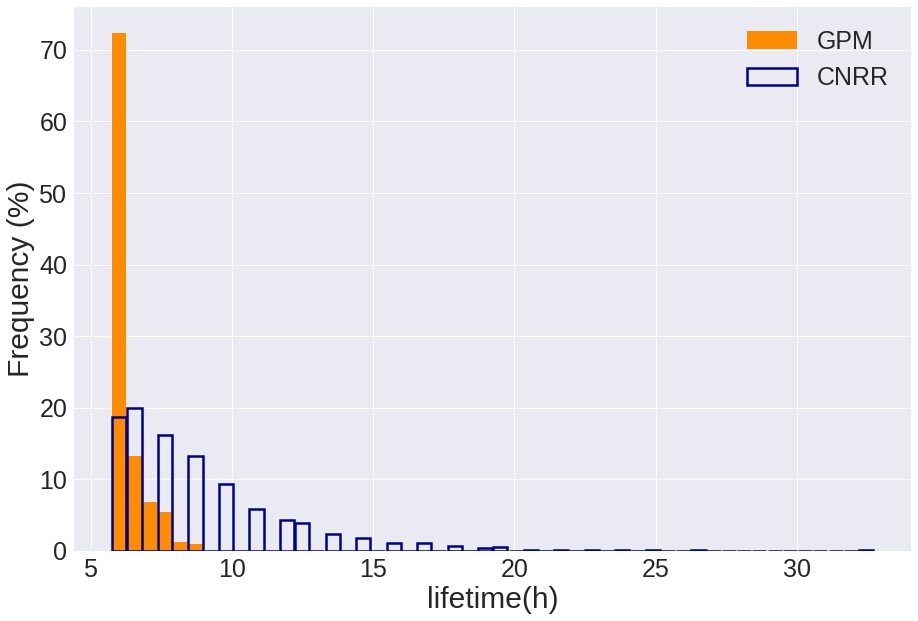

In [134]:
# Lifetimes of tracked features:

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})

#plt.figure(figsize=(20, 17))
fig_lifetime, ax_lifetime= plt.subplots(figsize= (15,10))

xaxis = edges_gpm[:-1]
plt.bar(xaxis, hist/np.nansum(hist)*100, width=0.5, color='darkorange', label= 'GPM')
plt.bar(xaxis, hist_cnrr/np.nansum(hist_cnrr)*100, width=0.5, edgecolor='darkblue', color= 'None', linewidth= 2.5, label= 'CNRR' )


ax_lifetime.set_xlabel('lifetime(h)', fontsize= 30)
ax_lifetime.set_ylabel('Frequency (%)', fontsize = 30)
plt.legend(fontsize= 25)


# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/heavy_impact_comparison_gpm_cnrr.png')

## Plot selected cells

In [150]:
subset = Tracks_gpm[Tracks_gpm.flag == 2].sort_values(by= 'total_precip')[0:20000]

In [182]:
cells_selected = gpm_cells[gpm_cells.TP_flag == 2][0:1000]


In [185]:
# choose only cells which are selected 
cells = cells_selected.id.values 
df= pd.DataFrame(columns= Tracks_gpm.columns)
for i in cells:
    df = df.append(Tracks_gpm[Tracks_gpm.cell == i])

In [138]:
import tobac
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

shpfilename= '/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
#reader = shpreader.Reader(shpfilename)

shape_feature = ShapelyFeature(Reader(shpfilename).geometries(),
                                ccrs.PlateCarree(),facecolor='none', edgecolor='black' , linewidth = 2.0)

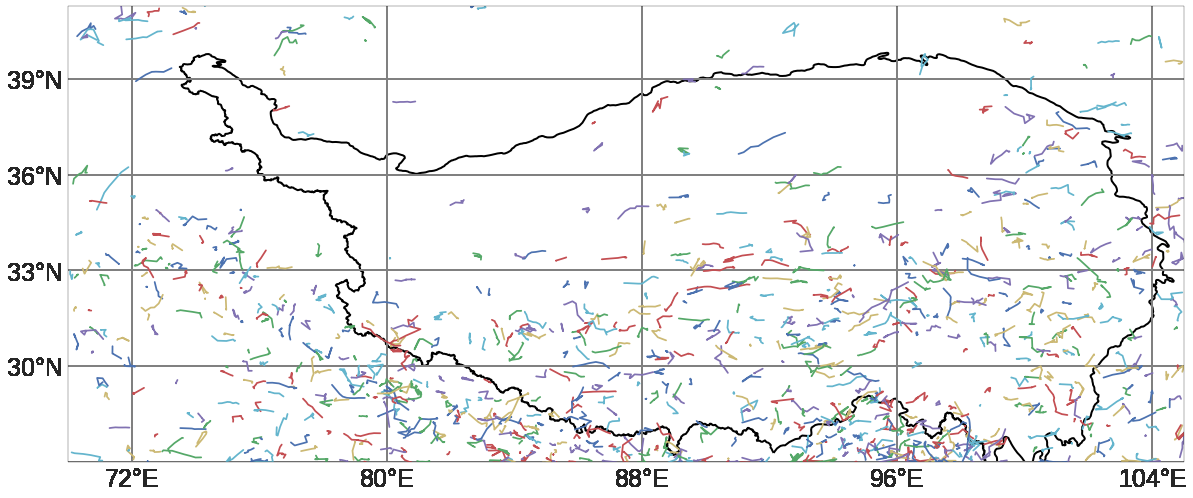

In [171]:
axis_extent= [70, 105, 27.0, 40 ]

# Plot map with all individual tracks:
import tobac
import cartopy.crs as ccrs
fig_map,ax_map=plt.subplots(figsize=(20,20),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map=tobac.map_tracks(df,axis_extent=axis_extent,axes=ax_map)

# Plot TP boundary polyline from shapefile 
ax_map.add_feature(shape_feature)
plt.ylabel('Lat', fontsize= '25')
plt.xlabel('Lon', fontsize= '25')

plt.savefig('/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tobac/Plot/tracks_gpm_tpflag1000.png')